<a href="https://colab.research.google.com/github/NienkevanHeek/portfolio_projects/blob/main/Notebook_CO2_and_Energy_for_report_CO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INTRODUCTION**
This assignment focuses on three questions:
1. What is the biggest predictor of a large CO2 output per capita of a country?
2. Which countries are making the biggest strides in decreasing CO2?
3. Which non-fossil fuel energy technology will have the best price in the future?

#**QUESTION 1**
What is the biggest predictor of a large CO2 output per capita of a country?


*   I will start by looking at the countries that produce most CO2, and the countries that produce least CO2, to see if those countries seem to have something in common that might explain their high/low CO2 outputs.
*   In addition to this, I will look at Energy consumption per capita vs CO2-output, and the energy mix of countries (how many renewables), because these seem to have a significant impact on CO2 output.



###**Preparing CO2-dataset**


In [ ]:
# Importing relevant modules
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [ ]:
# Import the CO2 dataset
df_CO2 = pd.read_csv('https://raw.githubusercontent.com/NienkevanHeek/datafiles/main/owid-co2-data.csv')
df_CO2

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50593,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.114,0.001,0.001,0.002,0.0,115.59,28.30,0.910,9.486
50594,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.114,0.001,0.001,0.002,0.0,118.22,30.83,0.771,6.537
50595,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.113,0.001,0.001,0.002,0.0,117.96,30.53,0.978,8.795
50596,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.112,0.001,0.001,0.002,0.0,NaN,NaN,1.006,9.481


In [ ]:
# This dataset has many columns that are not directly relevant to the question at hand.
# For now, we will keep country,  year, population, co2 and co2_per_capita
df_co2short = df_CO2[['country', 'year', 'population', 'co2', 'co2_per_capita']]
df_co2short

,country,year,population,co2,co2_per_capita
0,Afghanistan,1850,3752993.0,NaN,NaN
1,Afghanistan,1851,3767956.0,NaN,NaN
2,Afghanistan,1852,3783940.0,NaN,NaN
3,Afghanistan,1853,3800954.0,NaN,NaN
4,Afghanistan,1854,3818038.0,NaN,NaN
...,...,...,...,...,...
50593,Zimbabwe,2017,14751101.0,9.596,0.651
50594,Zimbabwe,2018,15052191.0,11.795,0.784
50595,Zimbabwe,2019,15354606.0,11.115,0.724
50596,Zimbabwe,2020,15669663.0,10.608,0.677


###**Five highest and lowest producers of CO (per capita) in 2021**

In [ ]:
#Let's sort the data and use the data from 2021 to see who were the highest and lowest CO2 contributors.
#I will look at CO2 per capita, this takes into account the size of the population.
df_co2short.sort_values('year', ascending = False)
co2_grouped = df_co2short.groupby('year')

df2021 = co2_grouped.get_group(2021)
df2021.dropna(subset = 'co2_per_capita', inplace = True)

df2021

<ipython-input-4-0bcd668fc26f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2021.dropna(subset = 'co2_per_capita', inplace = True)


,country,year,population,co2,co2_per_capita
171,Afghanistan,2021,4.009946e+07,11.874,0.296
443,Africa,2021,1.393677e+09,1450.796,1.041
959,Albania,2021,2.854710e+06,4.619,1.618
1131,Algeria,2021,4.417796e+07,176.269,3.990
1575,Andorra,2021,7.905700e+04,0.453,5.729
...,...,...,...,...,...
49637,Wallis and Futuna,2021,1.165400e+04,0.028,2.387
50081,World,2021,7.909295e+09,37123.852,4.694
50253,Yemen,2021,3.298164e+07,12.477,0.378
50425,Zambia,2021,1.947313e+07,7.676,0.394


In [ ]:
# Now let's look at the top 5 producers, and let's store the results in a table:
top_producers = df2021.sort_values('co2_per_capita', ascending = False).head(5)
top_producers

,country,year,population,co2,co2_per_capita
37959,Qatar,2021,2688239.0,95.667,35.587
4493,Bahrain,2021,1463266.0,39.016,26.664
24390,Kuwait,2021,4250111.0,106.134,24.972
46180,Trinidad and Tobago,2021,1525671.0,36.124,23.677
7196,Brunei,2021,445382.0,10.481,23.532


In [ ]:
# And the same for the lowest producing countries.
low_producers = df2021.sort_values('co2_per_capita', ascending = False).tail(5)
low_producers

,country,year,population,co2,co2_per_capita
27701,Malawi,2021,19889742.0,1.552,0.078
7712,Burundi,2021,12551215.0,0.693,0.055
8737,Central African Republic,2021,5457165.0,0.227,0.042
42409,Somalia,2021,17065588.0,0.610,0.036
11759,Democratic Republic of Congo,2021,95894120.0,2.607,0.027


###**Hypothesis on predictors of CO2 output**

1.   The lower producing countries are all poorer countries within Africa. My hypothesis, therefore, is that countries with a low GDP per capita also tend to produce less CO2 per capita.
2.  The top producing countries are seemingly all countries that are energy producing (they are have economies that are largely dependent on oil/gas). My hypothesis, therefore, is that the type of industry dominant in the local economy is relevant to its CO2 output.



###**CO2 output and GDP per capita**

In [ ]:
#First, lets start by adding GDP per capita to the table.
#Will give a copy warning, but in this case does not seem so bad
df_co2short['gdp_per_capita'] = df_CO2['GDP per capita'] = df_CO2['gdp']/df_CO2['population']
df_co2short.dropna(subset = 'gdp_per_capita', inplace = True)
df_co2short

<ipython-input-7-d2e4fdea7d87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_co2short['gdp_per_capita'] = df_CO2['GDP per capita'] = df_CO2['gdp']/df_CO2['population']
<ipython-input-7-d2e4fdea7d87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_co2short.dropna(subset = 'gdp_per_capita', inplace = True)


,country,year,population,co2,co2_per_capita,gdp_per_capita
100,Afghanistan,1950,7480464.0,0.084,0.011,1259.467336
101,Afghanistan,1951,7571542.0,0.092,0.012,1280.093250
102,Afghanistan,1952,7667534.0,0.092,0.012,1306.459816
103,Afghanistan,1953,7764549.0,0.106,0.014,1369.109759
104,Afghanistan,1954,7864289.0,0.106,0.014,1381.734613
...,...,...,...,...,...,...
50590,Zimbabwe,2014,13855758.0,11.946,0.862,1531.673864
50591,Zimbabwe,2015,14154937.0,12.255,0.866,1485.520916
50592,Zimbabwe,2016,14452705.0,10.533,0.729,1450.371681
50593,Zimbabwe,2017,14751101.0,9.596,0.651,1487.877848


In [ ]:
#Data for 2021 is not available for GDP per capita/CO2. The most recent year is 2018, which we will use.
groupeddata = df_co2short.groupby('year')
year2018 = groupeddata.get_group(2018)
year2018

,country,year,population,co2,co2_per_capita,gdp_per_capita
168,Afghanistan,2018,3.668679e+07,10.818,0.295,1842.488066
956,Albania,2018,2.877019e+06,4.984,1.732,11820.955154
1128,Algeria,2018,4.192701e+07,173.912,4.148,14079.648889
1744,Angola,2018,3.127354e+07,22.779,0.728,5625.509125
2431,Argentina,2018,4.441359e+07,180.599,4.066,18673.861919
...,...,...,...,...,...,...
49463,Vietnam,2018,9.491433e+07,274.223,2.889,6969.320822
50078,World,2018,7.683790e+09,36826.508,4.793,14788.297698
50250,Yemen,2018,3.079051e+07,10.474,0.340,2242.337522
50422,Zambia,2018,1.783590e+07,7.412,0.416,3418.870329


In [ ]:
#Let's do a quick check to see if the top producers are still similar:
top_producers2018 = year2018.sort_values('co2_per_capita', ascending = False).head(10)
top_producers2018

,country,year,population,co2,co2_per_capita,gdp_per_capita
37956,Qatar,2018,2766743.0,95.232,34.420,144809.036485
46177,Trinidad and Tobago,2018,1504707.0,40.328,26.801,23059.207652
47661,United Arab Emirates,2018,9140172.0,210.218,22.999,80403.981516
24387,Kuwait,2018,4317190.0,97.045,22.479,64189.239063
4490,Bahrain,2018,1487346.0,32.787,22.044,42061.030673
23701,Kazakhstan,2018,18538100.0,331.821,17.899,25014.459211
40487,Saudi Arabia,2018,35018132.0,626.191,17.882,47899.145723
3766,Australia,2018,24979228.0,416.284,16.665,49583.582852
48155,United States,2018,332140032.0,5376.657,16.188,54617.462728
8390,Canada,2018,37035260.0,584.369,15.779,45076.004398


In [ ]:
low_producers2018 = year2018.sort_values('co2_per_capita', ascending = False).tail(10)
low_producers2018

,country,year,population,co2,co2_per_capita,gdp_per_capita
47313,Uganda,2018,41515400.0,5.631,0.136,2085.589305
41274,Sierra Leone,2018,7861287.0,1.037,0.132,1352.045266
9078,Chad,2018,15604213.0,2.007,0.129,2000.287921
38748,Rwanda,2018,12531810.0,1.281,0.102,1834.445207
27698,Malawi,2018,18367886.0,1.570,0.085,1229.028506
32818,Niger,2018,22577060.0,1.793,0.079,907.267939
7709,Burundi,2018,11493476.0,0.684,0.059,636.370488
8734,Central African Republic,2018,5094795.0,0.220,0.043,703.067045
11756,Democratic Republic of Congo,2018,87087352.0,2.472,0.028,939.819349
37784,Puerto Rico,2018,3319269.0,NaN,NaN,34815.878450


In [ ]:
#We are going to check the correlation between GDP and CO2 per capita.
#We need to drop the NaN values
year2018.dropna(subset = ['co2_per_capita', 'gdp_per_capita'], inplace = True)

<ipython-input-11-3ffa579a0f10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year2018.dropna(subset = ['co2_per_capita', 'gdp_per_capita'], inplace = True)


In [ ]:
#We first want to check if there are any rows that have aggregate data (e.g. world, lower-income countries, Africa, South_America), We want to remove those.
#We can do this by first checking what unique values are in the column 'country'
checklist2018 = year2018['country'].unique()
checklist2018

#It seems we only need to remove one value: World
value = ['World']
year2018 = year2018[year2018.country.isin(value) == False]
year2018

,country,year,population,co2,co2_per_capita,gdp_per_capita
168,Afghanistan,2018,36686788.0,10.818,0.295,1842.488066
956,Albania,2018,2877019.0,4.984,1.732,11820.955154
1128,Algeria,2018,41927008.0,173.912,4.148,14079.648889
1744,Angola,2018,31273538.0,22.779,0.728,5625.509125
2431,Argentina,2018,44413592.0,180.599,4.066,18673.861919
...,...,...,...,...,...,...
49291,Venezuela,2018,29825652.0,102.672,3.442,10374.057192
49463,Vietnam,2018,94914328.0,274.223,2.889,6969.320822
50250,Yemen,2018,30790514.0,10.474,0.340,2242.337522
50422,Zambia,2018,17835898.0,7.412,0.416,3418.870329


In [ ]:
#Calculating the Pearson correlation:
pearson_result2018 = sp.stats.pearsonr(year2018['gdp_per_capita'], year2018['co2_per_capita'])
pearson_result2018

#Based on the Pearson Correlation, there is a strong positive correlation between CO2 and GDP. The P-value is very low, indicating that the result is significant.

PearsonRResult(statistic=0.7864385851970921, pvalue=1.0037144160698617e-35)

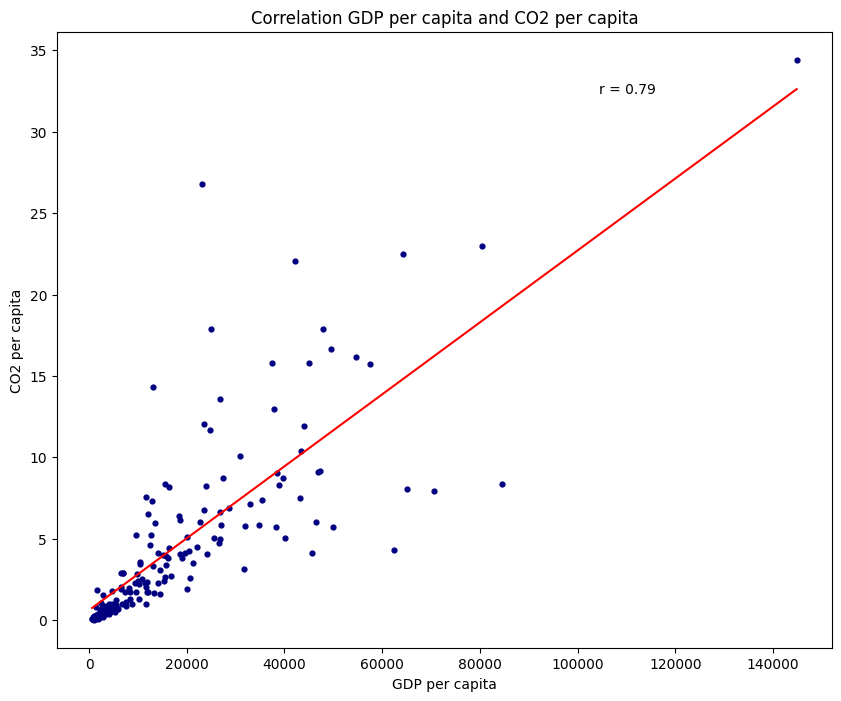

In [ ]:
#Let's make a scatter plot to confirm:
x = year2018['gdp_per_capita']
y = year2018['co2_per_capita']

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Correlation GDP per capita and CO2 per capita')
ax.set_xlabel('GDP per capita')
ax.set_ylabel('CO2 per capita')
plt.scatter(x, y, color = 'navy', s = 12)
r, p = sp.stats.pearsonr(x, y)
plt.annotate('r = {:.2f}'.format(r), xy=(0.7, 0.9), xycoords='axes fraction')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'red')
plt.show()

###**Conclusions GDP per capita and CO2 per capita**
There is a strong positive correlation between GDP and CO2 per capita (0.79).

###**Types of industry in economy and CO2 output**


To find out if there is a correlation between CO2 and the type of sectors in an economy, I am going to use four World Bank datasets that look at the percentage of GDP of the following sectors: [1] Industry, [2] Manufacturing, [3] Agriculture, Forestry, Fishing, [4] Services. In addition to this, I will use the CO2 table that I used before. For this dataset we will look at data from 2018, this is the most recent datapoint at which we can compare types of industry and CO2.

In [ ]:
# Industry
url = 'https://raw.githubusercontent.com/NienkevanHeek/datafiles/main/Industryfinal.csv'
df_industry = pd.read_csv(url)
df_industry

#Creating a dataframe with country name and 2018 data in it, so we can merge it later with the CO2 table
df_industrydata = df_industry[['Country Name', '2018']]
df_industrydata

#Rename '2018' column header to Industry, so that we can distinguish it from the other industries:
df_industrydata.rename(columns = {'2018' : 'Industry'}, inplace = True)
df_industrydata

<ipython-input-15-4afa50c89519>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_industrydata.rename(columns = {'2018' : 'Industry'}, inplace = True)


,Country Name,Industry
0,Aruba,11.358156
1,Africa Eastern and Southern,26.842740
2,Afghanistan,13.387247
3,Africa Western and Central,26.545680
4,Angola,47.931542
...,...,...
261,Kosovo,27.908359
262,"Yemen, Rep.",15.209188
263,South Africa,23.601626
264,Zambia,34.485322


In [ ]:
#Manufacturing
urlmanu = 'https://raw.githubusercontent.com/NienkevanHeek/datafiles/main/Manufacturing.csv'
df_manufacturing = pd.read_csv(urlmanu)
df_manufacturing

df_manufacturingdata = df_manufacturing[['Country Name', '2018']]

#Rename 2021 to Manufacturing
df_manufacturingdata.rename(columns = {'2018' : 'Manufacturing'}, inplace = True)
df_manufacturingdata

<ipython-input-16-528c29798fff>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_manufacturingdata.rename(columns = {'2018' : 'Manufacturing'}, inplace = True)


,Country Name,Manufacturing
0,Aruba,3.225015
1,Africa Eastern and Southern,10.879754
2,Afghanistan,6.160177
3,Africa Western and Central,10.407540
4,Angola,6.059469
...,...,...
261,Kosovo,13.127486
262,"Yemen, Rep.",NaN
263,South Africa,12.491946
264,Zambia,6.847766


In [ ]:
#Agriculture, Forestry, Fishing
urlAgri = 'https://raw.githubusercontent.com/NienkevanHeek/datafiles/main/AgriMSDOS.csv'
df_agri = pd.read_csv(urlAgri)


df_agri = df_agri[['Country Name', '2018']]


df_agri.rename(columns = {'2018' : "Agri, Forestry, Fishing"}, inplace = True)
df_agri

,Country Name,"Agri, Forestry, Fishing"
0,Aruba,0.022253
1,Africa Eastern and Southern,11.946077
2,Afghanistan,22.042897
3,Africa Western and Central,20.510893
4,Angola,8.607742
...,...,...
261,Kosovo,6.531164
262,"Yemen, Rep.",17.183127
263,South Africa,2.266089
264,Zambia,3.341124


In [ ]:
#Services
urlservice = 'https://raw.githubusercontent.com/NienkevanHeek/datafiles/main/Services.csv'
df_service = pd.read_csv(urlservice)
df_service = df_service[['Country Name', '2018']]

df_service.rename(columns = {'2018':'Services'}, inplace = True)

df_service

,Country Name,Services
0,Aruba,79.729079
1,Africa Eastern and Southern,53.371820
2,Afghanistan,59.477423
3,Africa Western and Central,49.154732
4,Angola,43.206910
...,...,...
261,Kosovo,46.198640
262,"Yemen, Rep.",24.994086
263,South Africa,64.190990
264,Zambia,54.244543


In [ ]:
#Preparing the CO2_short table so that it only includes data from 2018:
yearco2 = df_co2short.groupby('year')
year2018 = yearco2.get_group(2018)
year2018

,country,year,population,co2,co2_per_capita,gdp_per_capita
168,Afghanistan,2018,3.668679e+07,10.818,0.295,1842.488066
956,Albania,2018,2.877019e+06,4.984,1.732,11820.955154
1128,Algeria,2018,4.192701e+07,173.912,4.148,14079.648889
1744,Angola,2018,3.127354e+07,22.779,0.728,5625.509125
2431,Argentina,2018,4.441359e+07,180.599,4.066,18673.861919
...,...,...,...,...,...,...
49463,Vietnam,2018,9.491433e+07,274.223,2.889,6969.320822
50078,World,2018,7.683790e+09,36826.508,4.793,14788.297698
50250,Yemen,2018,3.079051e+07,10.474,0.340,2242.337522
50422,Zambia,2018,1.783590e+07,7.412,0.416,3418.870329


In [ ]:
#Merging the tables:
fullco2 = year2018.merge(df_industrydata, left_on = 'country', right_on = 'Country Name').merge(df_manufacturingdata, left_on = 'country', right_on = 'Country Name').merge(df_agri, left_on = 'country', right_on = 'Country Name').merge(df_service, left_on = 'country', right_on = 'Country Name')

fullco2.drop(columns = ['Country Name_x', 'Country Name_y'], inplace = True)

fullco2

<ipython-input-20-ebb0d5833046>:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Country Name_x'} in the result is deprecated and will raise a MergeError in a future version.
  fullco2 = year2018.merge(df_industrydata, left_on = 'country', right_on = 'Country Name').merge(df_manufacturingdata, left_on = 'country', right_on = 'Country Name').merge(df_agri, left_on = 'country', right_on = 'Country Name').merge(df_service, left_on = 'country', right_on = 'Country Name')


,country,year,population,co2,co2_per_capita,gdp_per_capita,Industry,Manufacturing,"Agri, Forestry, Fishing",Services
0,Afghanistan,2018,3.668679e+07,10.818,0.295,1842.488066,13.387247,6.160177,22.042897,59.477423
1,Albania,2018,2.877019e+06,4.984,1.732,11820.955154,21.279410,6.133294,18.429495,47.755628
2,Algeria,2018,4.192701e+07,173.912,4.148,14079.648889,38.805186,26.549953,11.874201,45.287435
3,Angola,2018,3.127354e+07,22.779,0.728,5625.509125,47.931542,6.059469,8.607742,43.206910
4,Argentina,2018,4.441359e+07,180.599,4.066,18673.861919,23.719592,14.060143,4.537879,56.369750
...,...,...,...,...,...,...,...,...,...,...
141,Uzbekistan,2018,3.244958e+07,116.464,3.589,10381.483739,27.241912,15.914345,26.562713,34.592841
142,Vietnam,2018,9.491433e+07,274.223,2.889,6969.320822,36.542440,23.367168,12.306675,42.170913
143,World,2018,7.683790e+09,36826.508,4.793,14788.297698,27.229151,16.393778,3.951747,64.140027
144,Zambia,2018,1.783590e+07,7.412,0.416,3418.870329,34.485322,6.847766,3.341124,54.244543


In [ ]:
# Now we want to organize the table again by the highest and lowest producers:
top_producers = fullco2.sort_values('co2_per_capita', ascending = False).head(5)
top_producers

,country,year,population,co2,co2_per_capita,gdp_per_capita,Industry,Manufacturing,"Agri, Forestry, Fishing",Services
112,Qatar,2018,2766743.0,95.232,34.420,144809.036485,60.381523,8.237424,0.218258,43.092417
132,Trinidad and Tobago,2018,1504707.0,40.328,26.801,23059.207652,40.231465,17.999697,1.027005,57.237138
137,United Arab Emirates,2018,9140172.0,210.218,22.999,80403.981516,46.918958,8.925790,0.711464,52.369578
72,Kuwait,2018,4317190.0,97.045,22.479,64189.239063,60.320729,7.451580,0.447339,51.917455
9,Bahrain,2018,1487346.0,32.787,22.044,42061.030673,42.860558,17.619968,0.288060,55.759874


In [ ]:
low_producers = fullco2.sort_values('co2_per_capita', ascending = True).head(5)
low_producers

,country,year,population,co2,co2_per_capita,gdp_per_capita,Industry,Manufacturing,"Agri, Forestry, Fishing",Services
25,Central African Republic,2018,5094795.0,0.220,0.043,703.067045,20.555756,18.131538,31.241332,43.008588
21,Burundi,2018,11493476.0,0.684,0.059,636.370488,11.107217,NaN,29.011900,49.114983
99,Niger,2018,22577060.0,1.793,0.079,907.267939,19.741738,7.398879,37.661663,36.620871
81,Malawi,2018,18367886.0,1.570,0.085,1229.028506,18.371131,NaN,21.629436,53.445150
114,Rwanda,2018,12531810.0,1.281,0.102,1834.445207,17.335504,7.624583,24.626823,49.698660


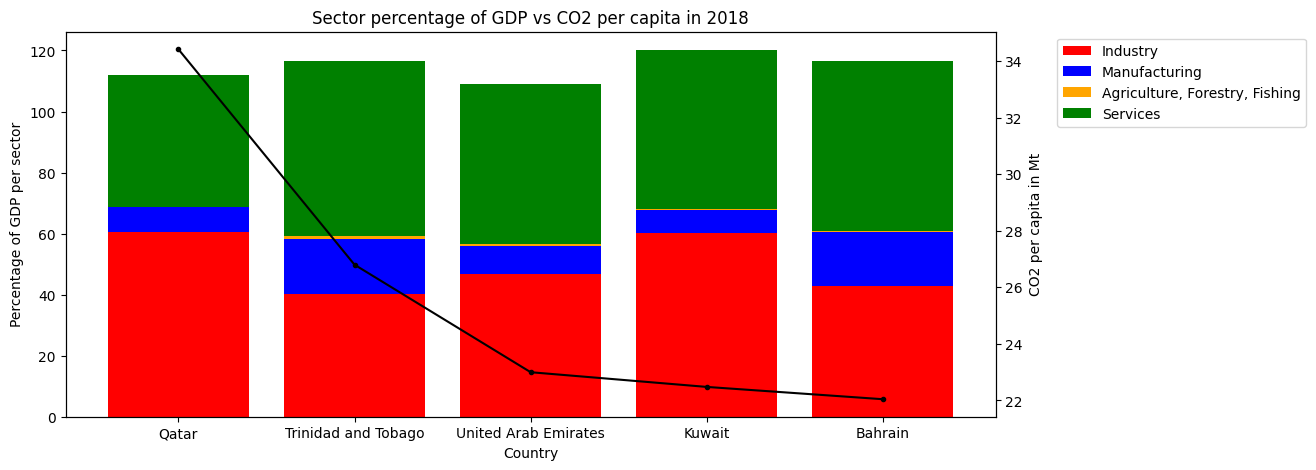

In [ ]:
# We can now create a stacked bar chart, which lists the percentages of each sector and the CO2 per capita in a line on top:
x = top_producers['country']
y1 = top_producers['Industry']
y2 = top_producers['Manufacturing']
y3 = top_producers['Agri, Forestry, Fishing']
y4 = top_producers['Services']
y5 = top_producers['co2_per_capita']


fig, ax = plt.subplots(figsize = (12, 5))
ax2 = ax.twinx()
ax.set_title('Sector percentage of GDP vs CO2 per capita in 2018')
ax.set_xlabel('Country')
ax.bar(x, y1, color = 'red')
ax.bar(x, y2, bottom = y1, color = 'blue')
ax.bar(x, y3, bottom = y1 + np.nan_to_num(y2), color = 'orange')
ax.bar(x, y4, bottom = y1 + np.nan_to_num(y2) + y3, color = 'green')
ax.legend(['Industry', 'Manufacturing', 'Agriculture, Forestry, Fishing', 'Services'], bbox_to_anchor=(1.2, 1), loc = 'upper center')
ax2.plot(x, y5, color = 'black', marker = '.')
ax.set_ylabel('Percentage of GDP per sector')
ax2.set_ylabel('CO2 per capita in Mt')
plt.show()

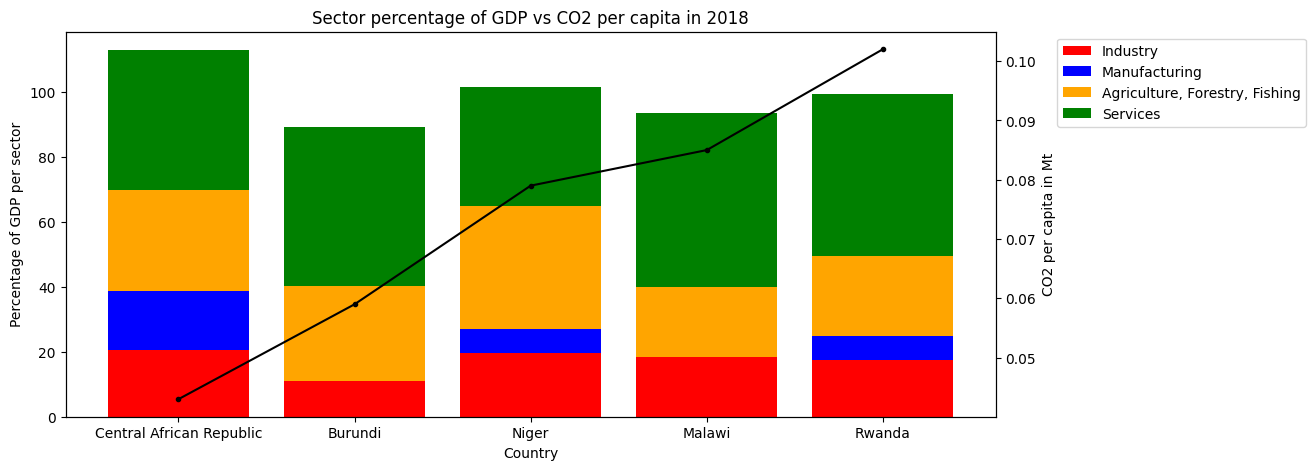

In [ ]:
#For the lowest producers the graph looks like this
x = low_producers['country']
y1 = low_producers['Industry']
y2 = low_producers['Manufacturing']
y3 = low_producers['Agri, Forestry, Fishing']
y4 = low_producers['Services']
y5 = low_producers['co2_per_capita']


fig, ax = plt.subplots(figsize = (12, 5))
ax2 = ax.twinx()
ax.set_title('Sector percentage of GDP vs CO2 per capita in 2018')
ax.set_xlabel('Country')
ax.bar(x, y1, color = 'red')
ax.bar(x, y2, bottom = y1, color = 'blue')
ax.bar(x, y3, bottom = y1 + np.nan_to_num(y2), color = 'orange')
ax.bar(x, y4, bottom = y1 + np.nan_to_num(y2) + y3, color = 'green')
ax.legend(['Industry', 'Manufacturing', 'Agriculture, Forestry, Fishing', 'Services'], bbox_to_anchor=(1.2, 1), loc = 'upper center')
ax2.plot(x, y5, color = 'black', marker = '.')
ax.set_ylabel('Percentage of GDP per sector')
ax2.set_ylabel('CO2 per capita in Mt')
plt.show()

In [ ]:
#Lastly, I will look at the correlation and P-value of each sector and the CO2
#There is a moderately strong positive correlation between Industry and CO2, P-value is significant.
fullco2.dropna(subset = ['Industry', 'co2_per_capita'], inplace = True)

industryco2 = sp.stats.pearsonr(fullco2['Industry'], fullco2['co2_per_capita'])
industryco2

PearsonRResult(statistic=0.4298633037127094, pvalue=6.821714535337683e-08)

In [ ]:
#Manufacturing
#Not significant positive correlation between Manufacturing and CO2, P-value of more than 0.05, so not significant. Manufacturing seems of little influence.
fullco2.dropna(subset = ['Manufacturing'], inplace = True)

manufacturingco2 = sp.stats.pearsonr(fullco2['Manufacturing'], fullco2['co2_per_capita'])
manufacturingco2


PearsonRResult(statistic=0.009189683515443803, pvalue=0.9144965204957964)

In [ ]:
#Agriculture
#Moderately strong negative correlation between these sectors and CO2 output. P-value indicates signifance.
fullco2.dropna(subset = ['Agri, Forestry, Fishing'], inplace = True)

Agrico2 = sp.stats.pearsonr(fullco2['Agri, Forestry, Fishing'], fullco2['co2_per_capita'])
Agrico2

PearsonRResult(statistic=-0.5078898444288117, pvalue=1.749988714295704e-10)

In [ ]:
#Services
#Small positive correlation between Services, P-value is lower dan 0.05 and thus indicates signifance.
fullco2.dropna(subset = ['Services'], inplace = True)

Servicesco2 = sp.stats.pearsonr(fullco2['Services'], fullco2['co2_per_capita'])
Servicesco2

PearsonRResult(statistic=0.20210419580441186, pvalue=0.017035899434811735)

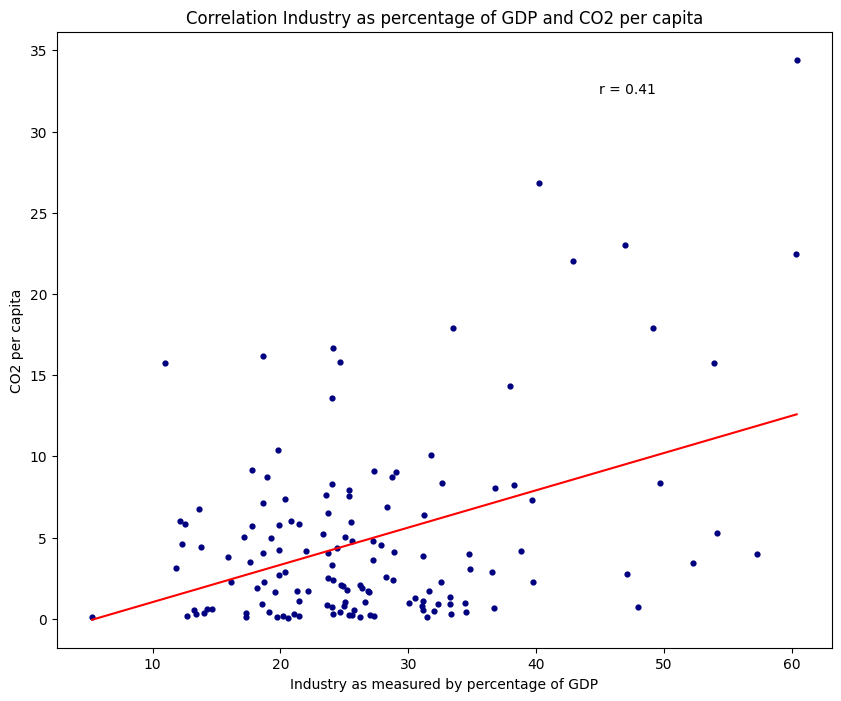

In [ ]:
#From the above Pearson numbers it seems that Industry has a moderately strong positive correlation with CO2.
#Agriculture, Forestry and Fishing sectors seem to have a moderately strong negative correlation.
#We can plot this in scatterplots:
#There are some outliers.
x = fullco2['Industry']
y = fullco2['co2_per_capita']

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Correlation Industry as percentage of GDP and CO2 per capita')
ax.set_xlabel('Industry as measured by percentage of GDP')
ax.set_ylabel('CO2 per capita')
plt.scatter(x, y, color = 'navy', s = 12)
r, p = sp.stats.pearsonr(x, y)
plt.annotate('r = {:.2f}'.format(r), xy=(0.7, 0.9), xycoords='axes fraction')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'red')
plt.show()


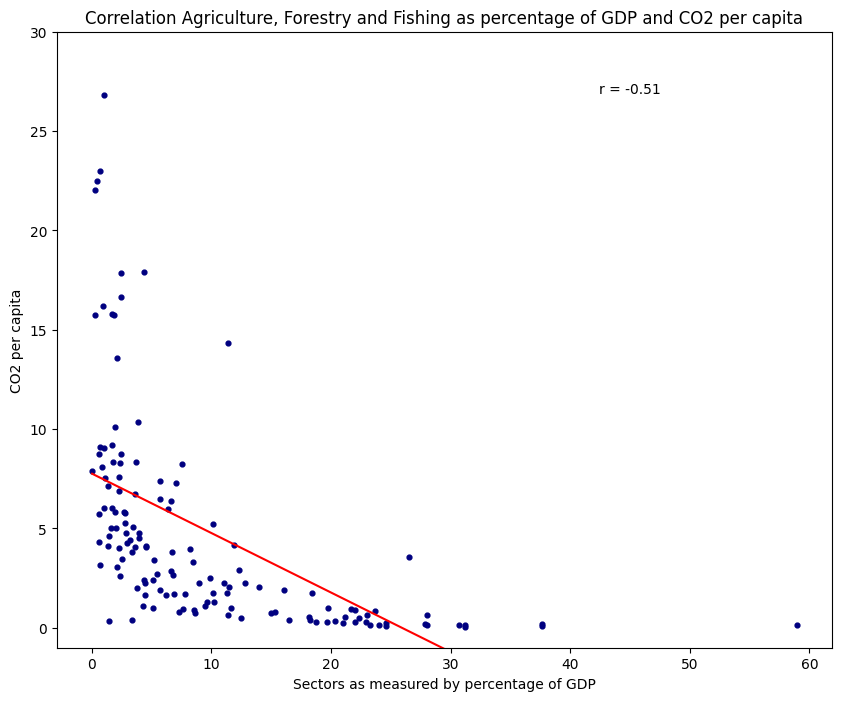

In [ ]:
#Agriculture, Forestry, Fishing
#The regression line shows the negative correlation, we also see a few outliers.
#There is quite a few country that have a very low GDP per capita, but higher numbers of CO2.
x = fullco2['Agri, Forestry, Fishing']
y = fullco2['co2_per_capita']

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Correlation Agriculture, Forestry and Fishing as percentage of GDP and CO2 per capita')
ax.set_xlabel('Sectors as measured by percentage of GDP')
ax.set_ylabel('CO2 per capita')
plt.ylim(bottom = -1.0, top = 30)
plt.scatter(x, y, color = 'navy', s = 12)
r, p = sp.stats.pearsonr(x, y)
plt.annotate('r = {:.2f}'.format(r), xy=(0.7, 0.9), xycoords='axes fraction')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'red')
plt.show()

###**Conclusions sectors as percentages of GDP and CO2**
There is a large difference in CO2 output of the top producers and the lowest producers. The sectors of the lower producers seem to be much more focused on Agriculture, Forestry and Fishing and have a lower percentage of Industry and Manufacturing. The highest producers have a large Industry and Manufacting sectors. Both the high and the lower producing countries have large service sectors.
The Pearson coefficients show that mainly Industry and Agriculture, Forestry and Fishing are correlated to CO2 output. Plots and pearson data show that, besides there being some outliers, there is a moderately positive correlation between Industry and CO2, and a moderately negative correlation between Agriculture, Forestry and Fishing and CO2.

**Note:** one thing that becomes immediately clear is that the percentages of GDP of the industries add up to more than one hundred. The datafiles for this dataset all come from the Worldbank. I do not know why the data adds up to more than one hundred percent. Perhaps some CO2 output is attributed to multiple industries (e.g. both Industry and Manufacturing.

###**Renewables in energy mix and CO2 output**

In [ ]:
#Load the dataset:
df_energy_mix = pd.read_csv('https://raw.githubusercontent.com/NienkevanHeek/datafiles/main/energy-consumption-by-source-and-country.csv')
df_energy_mix

,Entity,Code,Year,Other renewables (including geothermal and biomass) - TWh,Biofuels consumption - TWh,Solar consumption - TWh,Wind consumption - TWh,Hydro consumption - TWh,Nuclear consumption - TWh,Gas consumption - TWh,Coal consumption - TWh,Oil consumption - TWh
0,Africa,NaN,1971,0.523521,NaN,0.0000,0.0000,76.92131,0.0000,18.405262,383.01230,474.30540
1,Africa,NaN,1972,0.526714,NaN,0.0000,0.0000,87.62504,0.0000,24.670656,384.21082,510.72960
2,Africa,NaN,1973,0.542675,NaN,0.0000,0.0000,92.68892,0.0000,39.551792,408.91030,549.80396
3,Africa,NaN,1974,0.558636,NaN,0.0000,0.0000,105.46715,0.0000,44.518486,425.64618,569.73850
4,Africa,NaN,1975,0.549059,NaN,0.0000,0.0000,111.53163,0.0000,53.638380,451.08047,597.67100
...,...,...,...,...,...,...,...,...,...,...,...,...
5708,World,OWID_WRL,2018,1973.996000,1049.8936,1523.3044,3358.8267,11084.95400,6855.4080,38355.830000,43795.40000,53405.13700
5709,World,OWID_WRL,2019,2072.369100,1124.6016,1858.9540,3744.7256,11185.18900,7071.7817,39058.266000,43534.61300,53512.84400
5710,World,OWID_WRL,2020,2182.697300,1073.7583,2243.8350,4186.1810,11448.02700,6776.8660,38603.406000,42233.39000,48609.64500
5711,World,OWID_WRL,2021,2335.311500,1142.8717,2771.8290,4851.5940,11222.36000,7037.0690,40670.660000,44564.81200,51349.65600


In [ ]:
#There are aggregate data rows in there (e.g. world, middle-income countries etc)
checklist2 = df_energy_mix['Entity'].unique()
checklist2

array(['Africa', 'Africa (EI)', 'Algeria', 'Argentina', 'Asia',
       'Asia Pacific (EI)', 'Australia', 'Austria', 'Azerbaijan',
       'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria',
       'CIS (EI)', 'Canada', 'Central America (EI)', 'Chile', 'China',
       'Colombia', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
       'Eastern Africa (EI)', 'Ecuador', 'Egypt', 'Estonia', 'Europe',
       'Europe (EI)', 'European Union (27)', 'Finland', 'France',
       'Germany', 'Greece', 'High-income countries', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait',
       'Latvia', 'Lithuania', 'Lower-middle-income countries',
       'Luxembourg', 'Malaysia', 'Mexico', 'Middle Africa (EI)',
       'Middle East (EI)', 'Morocco', 'Netherlands', 'New Zealand',
       'Non-OECD (EI)', 'North America', 'North America (EI)',
       'North Macedonia', 'Norway', 'OECD (EI)', 'Oceania', 'Oman',
     

In [ ]:
#Removing the aggregate rows:
values2 = ['Africa',
           'Middle East (EI)',
           'Central America (EI)',
           'Non-OECD (EI)',
           'Eastern Africa (EI)',
           'Asia Pacific (EI)',
           'Europe (EI)',
           'CIS (EI)',
           'Western Africa (EI)',
           'Middle Africa (EI)',
           'South and Central America (EI)',
           'OECD (EI)',
           'Asia Pacific (EI)'
           'Africa (EI)',
           'North America (EI)',
           'Asia',
           'European Union (27)',
           'Europe',
           'High-income countries',
           'Upper-middle-income countries',
           'Low-income countries',
           'Lower-middle-income countries',
           'South America',
           'World',
           'North America',
           'Oceania']

df_energy_mix = df_energy_mix[df_energy_mix.Entity.isin(values2) == False]

In [ ]:
#Renaming the columns. All output is in TWh, so we can make the columns names more simple:
df_energy_mix.rename(columns = {
    'Other renewables (including geothermal and biomass) - TWh' : 'Other Renewables',
    'Biofuels consumption - TWh':'Biofuels',
    'Solar consumption - TWh': 'Solar',
    'Wind consumption - TWh': 'Wind',
    'Hydro consumption - TWh': 'Hydro',
    'Nuclear consumption - TWh':'Nuclear',
    'Gas consumption - TWh': 'Gas',
    'Coal consumption - TWh': 'Coal',
    'Oil consumption - TWh': 'Oil'
    }, inplace = True )

#Drop column
df_energy_mix.drop(columns = 'Code', inplace = True)
df_energy_mix

<ipython-input-34-4cf0bd1a3704>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy_mix.rename(columns = {
<ipython-input-34-4cf0bd1a3704>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy_mix.drop(columns = 'Code', inplace = True)


,Entity,Year,Other Renewables,Biofuels,Solar,Wind,Hydro,Nuclear,Gas,Coal,Oil
58,Africa (EI),1971,0.523521,NaN,0.0,0.0,76.921320,0.0,18.405264,383.012300,474.305360
59,Africa (EI),1972,0.526714,NaN,0.0,0.0,87.625046,0.0,24.670656,384.210820,510.729600
60,Africa (EI),1973,0.542675,NaN,0.0,0.0,92.688920,0.0,39.551792,408.910340,549.804000
61,Africa (EI),1974,0.558636,NaN,0.0,0.0,105.467155,0.0,44.518486,425.646200,569.738500
62,Africa (EI),1975,0.549059,NaN,0.0,0.0,111.531630,0.0,53.638374,451.080470,597.671100
...,...,...,...,...,...,...,...,...,...,...,...
5592,Vietnam,1966,NaN,NaN,NaN,NaN,1.153226,NaN,NaN,10.964335,39.364290
5593,Vietnam,1967,NaN,NaN,NaN,NaN,1.271505,NaN,NaN,12.016917,57.652416
5594,Vietnam,1968,NaN,NaN,NaN,NaN,1.419355,NaN,NaN,13.332631,58.814095
5595,Vietnam,1969,NaN,NaN,NaN,NaN,1.596774,NaN,NaN,14.209778,71.083626


In [ ]:
#Merging CO2 table and energy mix table:
df_energy_co2 = pd.merge(df_energy_mix, df_co2short, left_on = ['Entity', 'Year'], right_on = ['country', 'year'])
#Drop irrelevant columns
df_energy_co2.drop(['country', 'year', 'gdp_per_capita'], axis = 1, inplace = True)

df_energy_co2

,Entity,Year,Other Renewables,Biofuels,Solar,Wind,Hydro,Nuclear,Gas,Coal,Oil,population,co2,co2_per_capita
0,Algeria,1990,0.0,NaN,0.0,0.0,0.399194,0.0,195.09874,7.664170,111.811615,25518074.0,76.738,3.007
1,Algeria,1991,0.0,NaN,0.0,0.0,0.866398,0.0,192.69249,7.908400,110.627785,26133906.0,78.807,3.016
2,Algeria,1992,0.0,NaN,0.0,0.0,0.588441,0.0,198.94875,9.397039,111.292656,26748302.0,79.883,2.986
3,Algeria,1993,0.0,NaN,0.0,0.0,1.043817,0.0,178.54373,7.652540,110.754875,27354326.0,81.944,2.996
4,Algeria,1994,0.0,NaN,0.0,0.0,0.490860,0.0,188.16875,7.210600,106.050890,27937006.0,86.147,3.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,Vietnam,1966,NaN,NaN,NaN,NaN,1.153226,NaN,NaN,10.964335,39.364290,38388220.0,19.181,0.500
3954,Vietnam,1967,NaN,NaN,NaN,NaN,1.271505,NaN,NaN,12.016917,57.652416,39282564.0,22.962,0.585
3955,Vietnam,1968,NaN,NaN,NaN,NaN,1.419355,NaN,NaN,13.332631,58.814095,40145292.0,23.601,0.588
3956,Vietnam,1969,NaN,NaN,NaN,NaN,1.596774,NaN,NaN,14.209778,71.083626,41015868.0,27.056,0.660


In [ ]:
#Let's rename the non-capitalized words for consistency
df_energy_co2.rename(columns = {
    'population' : 'Population',
    'co2':'CO2',
    'co2_per_capita':'CO2_per_capita'
    }, inplace = True )

df_energy_co2

,Entity,Year,Other Renewables,Biofuels,Solar,Wind,Hydro,Nuclear,Gas,Coal,Oil,Population,CO2,CO2_per_capita
0,Algeria,1990,0.0,NaN,0.0,0.0,0.399194,0.0,195.09874,7.664170,111.811615,25518074.0,76.738,3.007
1,Algeria,1991,0.0,NaN,0.0,0.0,0.866398,0.0,192.69249,7.908400,110.627785,26133906.0,78.807,3.016
2,Algeria,1992,0.0,NaN,0.0,0.0,0.588441,0.0,198.94875,9.397039,111.292656,26748302.0,79.883,2.986
3,Algeria,1993,0.0,NaN,0.0,0.0,1.043817,0.0,178.54373,7.652540,110.754875,27354326.0,81.944,2.996
4,Algeria,1994,0.0,NaN,0.0,0.0,0.490860,0.0,188.16875,7.210600,106.050890,27937006.0,86.147,3.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,Vietnam,1966,NaN,NaN,NaN,NaN,1.153226,NaN,NaN,10.964335,39.364290,38388220.0,19.181,0.500
3954,Vietnam,1967,NaN,NaN,NaN,NaN,1.271505,NaN,NaN,12.016917,57.652416,39282564.0,22.962,0.585
3955,Vietnam,1968,NaN,NaN,NaN,NaN,1.419355,NaN,NaN,13.332631,58.814095,40145292.0,23.601,0.588
3956,Vietnam,1969,NaN,NaN,NaN,NaN,1.596774,NaN,NaN,14.209778,71.083626,41015868.0,27.056,0.660


In [ ]:
#Now we group each technology by year
#We'll use CO2 here, as opposed to CO2_per_capita. This is because when looking at the total energy mix of a country, it seems to make more sense to look at total co2, as opposed to co2 per capita.
#Moreover, co2 per capita has a large peak in co2 per capita around 1990, caused by the Oil Fires in Kuwait, see below graph!
df1 = df_energy_co2.groupby('Year')['Other Renewables'].sum()
df2 = df_energy_co2.groupby('Year')['Biofuels'].sum()
new_dataframe = pd.merge(df1, df2, on = 'Year')
new_dataframe['Solar'] = df_energy_co2.groupby('Year')['Solar'].sum()
new_dataframe['Wind'] = df_energy_co2.groupby('Year')['Wind'].sum()
new_dataframe['Hydro'] = df_energy_co2.groupby('Year')['Hydro'].sum()
new_dataframe['Nuclear'] = df_energy_co2.groupby('Year')['Nuclear'].sum()
new_dataframe['Gas'] = df_energy_co2.groupby('Year')['Gas'].sum()
new_dataframe['Coal'] = df_energy_co2.groupby('Year')['Coal'].sum()
new_dataframe['Oil'] = df_energy_co2.groupby('Year')['Oil'].sum()
new_dataframe['CO2'] = df_energy_co2.groupby('Year')['CO2'].sum()

new_dataframe


,Other Renewables,Biofuels,Solar,Wind,Hydro,Nuclear,Gas,Coal,Oil,CO2
Year,,,,,,,,,,
1965,55.949086,0.000000,0.000000,0.000000,2377.283962,67.189958,5071.793742,11938.493190,15325.652987,8719.527
1966,61.737607,0.000000,0.000000,0.000000,2514.291903,91.814692,5493.205678,11986.493209,16505.823563,9125.178
1967,62.353377,0.000000,0.000000,0.000000,2584.387680,109.851892,5857.462649,11686.360687,17661.095925,9358.293
1968,69.031915,0.000000,0.000000,0.000000,2689.745863,138.929862,6398.598407,11923.624002,19222.065018,9900.767
1969,72.558721,0.000000,0.000000,0.000000,2826.765877,164.858663,7074.416057,12339.384570,20885.885793,10612.631
1970,80.337949,3.604989,0.000000,0.000000,2941.436235,211.227993,7680.568908,13032.651197,22766.155410,11679.930
1971,83.198777,3.489813,0.000000,0.000000,3091.898160,295.881662,8173.318731,12827.446278,24023.677367,12064.284
1972,89.584144,4.304110,0.000000,0.000000,3255.284054,403.681848,8624.877864,12914.356485,25826.154464,12630.679
1973,96.013448,3.582667,0.000000,0.000000,3309.733302,537.180040,8926.368854,13372.121971,27905.803288,13299.064


In [ ]:
#Changing the index into a column called 'Year'
new_dataframe.reset_index(level=['Year'], inplace = True)
new_dataframe

,Year,Other Renewables,Biofuels,Solar,Wind,Hydro,Nuclear,Gas,Coal,Oil,CO2
0,1965,55.949086,0.000000,0.000000,0.000000,2377.283962,67.189958,5071.793742,11938.493190,15325.652987,8719.527
1,1966,61.737607,0.000000,0.000000,0.000000,2514.291903,91.814692,5493.205678,11986.493209,16505.823563,9125.178
2,1967,62.353377,0.000000,0.000000,0.000000,2584.387680,109.851892,5857.462649,11686.360687,17661.095925,9358.293
3,1968,69.031915,0.000000,0.000000,0.000000,2689.745863,138.929862,6398.598407,11923.624002,19222.065018,9900.767
4,1969,72.558721,0.000000,0.000000,0.000000,2826.765877,164.858663,7074.416057,12339.384570,20885.885793,10612.631
5,1970,80.337949,3.604989,0.000000,0.000000,2941.436235,211.227993,7680.568908,13032.651197,22766.155410,11679.930
6,1971,83.198777,3.489813,0.000000,0.000000,3091.898160,295.881662,8173.318731,12827.446278,24023.677367,12064.284
7,1972,89.584144,4.304110,0.000000,0.000000,3255.284054,403.681848,8624.877864,12914.356485,25826.154464,12630.679
8,1973,96.013448,3.582667,0.000000,0.000000,3309.733302,537.180040,8926.368854,13372.121971,27905.803288,13299.064
9,1974,102.464528,3.346716,0.000000,0.000000,3631.106347,694.134157,9046.249270,13358.983393,27071.043582,13150.551


In [ ]:
#Calculating the Total Renewables, Total Non-Renewable, Total Energy, Percent Non-Renewables, Percent Renewables
new_dataframe['Total Renewables'] = new_dataframe.loc[:, 'Other Renewables'] + new_dataframe.loc[:, 'Biofuels'] + new_dataframe.loc[:, 'Solar'] + new_dataframe.loc[:, 'Wind'] + new_dataframe.loc[:, 'Hydro']
new_dataframe['Total Non-Renewables'] = new_dataframe.loc[:, 'Nuclear'] + new_dataframe.loc[:, 'Gas'] + new_dataframe.loc[:, 'Coal'] + new_dataframe.loc[:, 'Oil']
new_dataframe['Total Energy'] = new_dataframe.loc[:, ['Other Renewables', 'Biofuels', 'Solar', 'Wind', 'Hydro', 'Nuclear', 'Gas', 'Coal', 'Oil']].sum(axis = 1)
new_dataframe['Percent Non-Renewables'] = new_dataframe['Total Non-Renewables'] / new_dataframe['Total Energy'] * 100
new_dataframe['Percent Renewables'] = new_dataframe['Total Renewables'] / new_dataframe['Total Energy'] * 100

new_dataframe

,Year,Other Renewables,Biofuels,Solar,Wind,Hydro,Nuclear,Gas,Coal,Oil,CO2,Total Renewables,Total Non-Renewables,Total Energy,Percent Non-Renewables,Percent Renewables
0,1965,55.949086,0.000000,0.000000,0.000000,2377.283962,67.189958,5071.793742,11938.493190,15325.652987,8719.527,2433.233048,32403.129876,34836.362924,93.015249,6.984751
1,1966,61.737607,0.000000,0.000000,0.000000,2514.291903,91.814692,5493.205678,11986.493209,16505.823563,9125.178,2576.029510,34077.337141,36653.366652,92.971916,7.028084
2,1967,62.353377,0.000000,0.000000,0.000000,2584.387680,109.851892,5857.462649,11686.360687,17661.095925,9358.293,2646.741057,35314.771153,37961.512210,93.027830,6.972170
3,1968,69.031915,0.000000,0.000000,0.000000,2689.745863,138.929862,6398.598407,11923.624002,19222.065018,9900.767,2758.777778,37683.217289,40441.995067,93.178433,6.821567
4,1969,72.558721,0.000000,0.000000,0.000000,2826.765877,164.858663,7074.416057,12339.384570,20885.885793,10612.631,2899.324598,40464.545082,43363.869681,93.313962,6.686038
5,1970,80.337949,3.604989,0.000000,0.000000,2941.436235,211.227993,7680.568908,13032.651197,22766.155410,11679.930,3025.379173,43690.603508,46715.982681,93.523888,6.476112
6,1971,83.198777,3.489813,0.000000,0.000000,3091.898160,295.881662,8173.318731,12827.446278,24023.677367,12064.284,3178.586751,45320.324038,48498.910789,93.446066,6.553934
7,1972,89.584144,4.304110,0.000000,0.000000,3255.284054,403.681848,8624.877864,12914.356485,25826.154464,12630.679,3349.172308,47769.070661,51118.242970,93.448186,6.551814
8,1973,96.013448,3.582667,0.000000,0.000000,3309.733302,537.180040,8926.368854,13372.121971,27905.803288,13299.064,3409.329416,50741.474153,54150.803569,93.704010,6.295990
9,1974,102.464528,3.346716,0.000000,0.000000,3631.106347,694.134157,9046.249270,13358.983393,27071.043582,13150.551,3736.917591,50170.410402,53907.327993,93.067886,6.932114


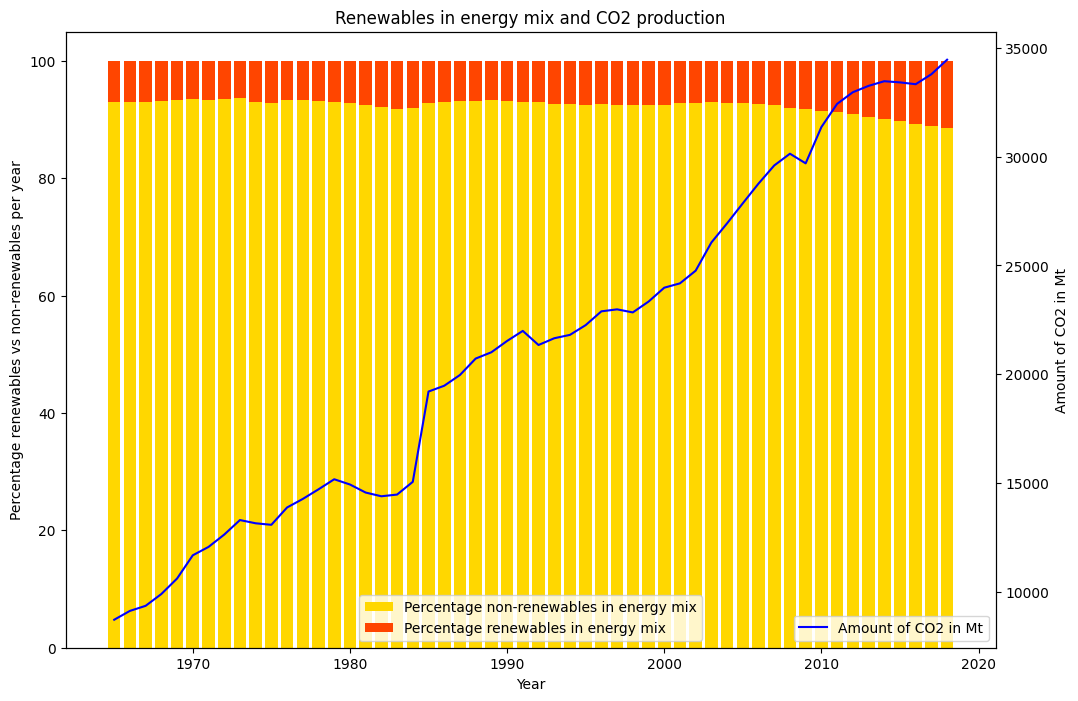

In [ ]:
#And plotting the results
x = new_dataframe['Year']
y1 = new_dataframe['Percent Non-Renewables']
y2 = new_dataframe['Percent Renewables']
y3 = new_dataframe['CO2']

fig, ax = plt.subplots(figsize = (12, 8))
ax2 = ax.twinx()
ax.set_title('Renewables in energy mix and CO2 production')
ax.set_xlabel('Year')
ax.bar(x, y1, color = 'gold', label = 'Percentage non-renewables in energy mix')
ax.bar(x, y2, bottom = y1,  color = 'orangered', label = 'Percentage renewables in energy mix')
ax2.plot(x, y3, color = 'blue', label = 'Amount of CO2 in Mt')
ax.set_ylabel('Percentage renewables vs non-renewables per year')
ax2.set_ylabel('Amount of CO2 in Mt')
ax.legend(loc = 'lower center')
ax2.legend(loc = 'lower right')
plt.show()





In [ ]:
renewablesco2 = sp.stats.pearsonr(new_dataframe['Percent Renewables'], new_dataframe['CO2'])
renewablesco2

PearsonRResult(statistic=0.72942690489182, pvalue=3.9528472926476e-10)

###**Conclusions renewables in energy mix and CO2 output**
From the above graph it is not entirely possible to see whether the percentage of renewables in the energy mix has an impact on the CO2 output. The CO2 output has steadily increased over the years, even though the amount of renewables in the energy mix has increased. When looking at the Pearson coefficient, 0.72, it seems like there is a strong positive correlation between the two. I think this might be indicative of a false relationship there. It would make sense that the amount of renewables has a negative correlation to the amount of CO2.

###**Energy use per person and CO2 output**
Lastly, I want to look at energy use per person and CO2 output. My hypothesis is that the energy use of persons is of influence on the CO2 output of the country.


In [ ]:
#We already uploaded the CO2 dataframe and created a more concise dataframe from that.
#Upload energy use per person:
df_energy = pd.read_csv('https://raw.githubusercontent.com/NienkevanHeek/datafiles/main/per-capita-energy-use.csv')

In [ ]:
#Look at df_energy
df_energy.head(10)
df_energy.columns.values
df_energy.describe()

,Year,Primary energy consumption per capita (kWh/person)
count,10602.000000,10602.000000
mean,1997.895020,25742.760048
std,14.694853,36122.506685
min,1965.000000,0.000000
25%,1987.000000,3101.076300
50%,1999.000000,13597.986000
75%,2010.000000,36847.052500
max,2022.000000,657539.200000


In [ ]:
#Let keep Entity, Year, Primary energy consumption per capita for this table.
df_energyshort = df_energy[['Entity', 'Year', 'Primary energy consumption per capita (kWh/person)']]
df_energyshort

,Entity,Year,Primary energy consumption per capita (kWh/person)
0,Afghanistan,1980,623.92865
1,Afghanistan,1981,786.83690
2,Afghanistan,1982,926.65125
3,Afghanistan,1983,1149.19590
4,Afghanistan,1984,1121.57290
...,...,...,...
10597,Zimbabwe,2017,3068.01150
10598,Zimbabwe,2018,3441.98580
10599,Zimbabwe,2019,3003.65530
10600,Zimbabwe,2020,2680.13180


In [ ]:
#Now we want to merge the energy table with the CO2_short table:
df_complete = pd.merge(df_co2short, df_energyshort, left_on = ['country', 'year'], right_on = ['Entity', 'Year'])
df_complete

,country,year,population,co2,co2_per_capita,gdp_per_capita,Entity,Year,Primary energy consumption per capita (kWh/person)
0,Afghanistan,1980,12486640.0,1.756,0.141,1227.699047,Afghanistan,1980,623.92865
1,Afghanistan,1981,11155196.0,1.978,0.177,1402.516257,Afghanistan,1981,786.83690
2,Afghanistan,1982,10088290.0,2.095,0.208,1584.055361,Afghanistan,1982,926.65125
3,Afghanistan,1983,9951447.0,2.520,0.253,1683.708221,Afghanistan,1983,1149.19590
4,Afghanistan,1984,10243689.0,2.822,0.275,1666.602000,Afghanistan,1984,1121.57290
...,...,...,...,...,...,...,...,...,...
7154,Zimbabwe,2014,13855758.0,11.946,0.862,1531.673864,Zimbabwe,2014,3940.88620
7155,Zimbabwe,2015,14154937.0,12.255,0.866,1485.520916,Zimbabwe,2015,3860.92020
7156,Zimbabwe,2016,14452705.0,10.533,0.729,1450.371681,Zimbabwe,2016,3227.68020
7157,Zimbabwe,2017,14751101.0,9.596,0.651,1487.877848,Zimbabwe,2017,3068.01150


In [ ]:
#So now we can drop Entity and Year
df_complete.drop(columns = ['Entity', 'Year'], axis = 1, inplace = True)
df_complete


,country,year,population,co2,co2_per_capita,gdp_per_capita,Primary energy consumption per capita (kWh/person)
0,Afghanistan,1980,12486640.0,1.756,0.141,1227.699047,623.92865
1,Afghanistan,1981,11155196.0,1.978,0.177,1402.516257,786.83690
2,Afghanistan,1982,10088290.0,2.095,0.208,1584.055361,926.65125
3,Afghanistan,1983,9951447.0,2.520,0.253,1683.708221,1149.19590
4,Afghanistan,1984,10243689.0,2.822,0.275,1666.602000,1121.57290
...,...,...,...,...,...,...,...
7154,Zimbabwe,2014,13855758.0,11.946,0.862,1531.673864,3940.88620
7155,Zimbabwe,2015,14154937.0,12.255,0.866,1485.520916,3860.92020
7156,Zimbabwe,2016,14452705.0,10.533,0.729,1450.371681,3227.68020
7157,Zimbabwe,2017,14751101.0,9.596,0.651,1487.877848,3068.01150


In [ ]:
#Now we want to know the values in country, because there might be some cumulative stats(like continents) in there that don't belong.
checklist3 = df_complete['country'].unique()
checklist3

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel',

In [ ]:
#We want to remove some rows:
values = ['Africa', 'Asia', 'European Union (27)', 'Europe', 'High-income countries', 'Upper-middle-income countries', 'Low-income countries', 'Lower-middle-income countries', 'South America', 'World', 'North America', 'Oceania']
df_complete = df_complete[df_complete.country.isin(values) == False]
df_complete

,country,year,population,co2,co2_per_capita,gdp_per_capita,Primary energy consumption per capita (kWh/person)
0,Afghanistan,1980,12486640.0,1.756,0.141,1227.699047,623.92865
1,Afghanistan,1981,11155196.0,1.978,0.177,1402.516257,786.83690
2,Afghanistan,1982,10088290.0,2.095,0.208,1584.055361,926.65125
3,Afghanistan,1983,9951447.0,2.520,0.253,1683.708221,1149.19590
4,Afghanistan,1984,10243689.0,2.822,0.275,1666.602000,1121.57290
...,...,...,...,...,...,...,...
7154,Zimbabwe,2014,13855758.0,11.946,0.862,1531.673864,3940.88620
7155,Zimbabwe,2015,14154937.0,12.255,0.866,1485.520916,3860.92020
7156,Zimbabwe,2016,14452705.0,10.533,0.729,1450.371681,3227.68020
7157,Zimbabwe,2017,14751101.0,9.596,0.651,1487.877848,3068.01150


In [ ]:
# Now lets compare the CO2 output per year per country and de energy comsumption per capita.
# To do this, we will first drop the rows where in CO2 or Primary energy where there is empty values:
df_complete.dropna(subset = ['co2', 'Primary energy consumption per capita (kWh/person)'], inplace = True)

<ipython-input-49-38f3f7473c17>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete.dropna(subset = ['co2', 'Primary energy consumption per capita (kWh/person)'], inplace = True)


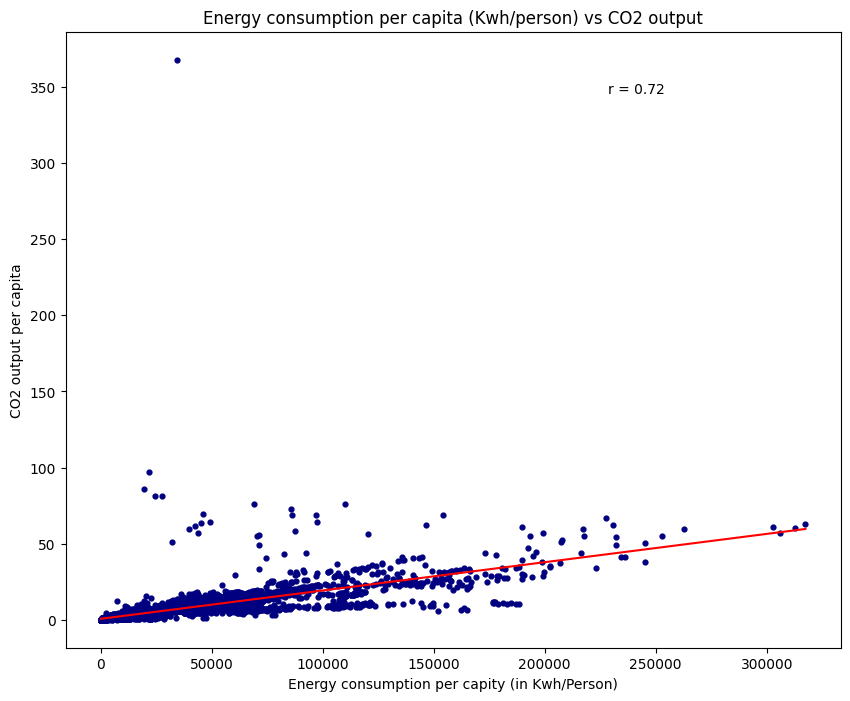

In [ ]:
# Let's create a scatter plot
x = df_complete['Primary energy consumption per capita (kWh/person)']
y = df_complete['co2_per_capita']

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title("Energy consumption per capita (Kwh/person) vs CO2 output")
ax.set_xlabel('Energy consumption per capity (in Kwh/Person)')
ax.set_ylabel('CO2 output per capita')
plt.scatter(x, y, color = 'navy', s = 12)
r, p = sp.stats.pearsonr(x, y)
plt.annotate('r = {:.2f}'.format(r), xy=(0.7, 0.9), xycoords='axes fraction')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'red')
plt.show()

In [ ]:
#And the pearson correlation (it is shown in the graph as well, but without a P-value). We will use CO2 per person for this.
#We could also look at the CO2 in total for this, but then the correlation is only 0.165
energyusepearsonpc = sp.stats.pearsonr(df_complete['Primary energy consumption per capita (kWh/person)'], df_complete['co2_per_capita'])
energyusepearsonpc

PearsonRResult(statistic=0.7186394072266684, pvalue=0.0)

In [ ]:
#We could also look at the CO2 in total for this, but then the correlation is only 0.165
#This is probably because oil producing countries produce a lot of co2, but have only a small amount of citizens!
energyusepearsonco2 = sp.stats.pearsonr(df_complete['Primary energy consumption per capita (kWh/person)'], df_complete['co2'])

###**Conclusions energy use per person and CO2 output**
There is a strong positive correlation between the energy use per person and the CO2 per capita. Lowering energy use per person is therefore expected to have a beneficial impact on lowering CO2 levels.

###**Overall conclusions question 1**

* This section focused on what the biggest predictor of a large CO2 output of a country is. To do this, we first distilled the highest and lowest producers of CO2 to see if this could give indications of why they would have high or low CO2 output.
* From the data, two hypothesis could be made: [1] GDP seems to have an impact on CO2 output, and [2] The type of sector dominant in the economy is or relevance when looking at CO2.
* Next to this, I hypothesized that [3] The amount of renewables in the energy mix has a positive impact on lowering CO2, and [4] The energy use per capita has an impact on CO2 output.
* For the majority of these hypothesis, I looked at CO2 per capita, rather than at CO2. The reason for this is that CO2 per capita takes into account the population of a country, and thus gives a fairer representation.
* The exception to this is the renewables in energy mix. Here I looked at CO2 total for two reasons. The first is that energy mix and CO2 correlation seems to be more fairly represented by CO2 in Mt than by CO2 per capita. The second reason is that the energy mix and CO2 per capita correlation seems to be highly skewed by some outliers in the data. These outliers could be caused, in the case of Kuwait, by the 1991 Oil Fires, and in other cases by the oil producing countries. These countries produce a lot of CO2, often with the help of foreign worker, but have low population numbers. This skewing of data was less visible with CO2 per capita.

What can we conclude?
* Out of these, the biggest predictor of a large CO2 output seems to be GDP. There is a very large difference between CO2 output of rich and poor countries, and when correlating the two, and plotting the results, the Pearson coefficient is 0.79, suggesting a strong positive correlation.
* The next predictor of a large CO2 output is energy use per capita. Here, data showed that there is a strong correlation between the CO2 per capita output of a country and its GDP, namely a Pearson correlation of 0.79, which suggests a high positive correlation.
* Dominant sectors in an economy also had an impact, although not for all sectors a strong correlation could be found.  Industry (0.51 positive) and existence of large Agriculture, Forestry and Fishing sectors (-0.41) seem to have a large impact. For Manufacturing a correlation could not be established, and for Services the correlation was only 0.20.
* Correlation between renewables in energy mix and CO2 output seems strongly correlated, but it seems this is a false relationship, as it seems unlikely that more renewables in the energy mix would lead to more CO2 output. In general CO2 output worldwide went up over the years, and renewables make up only a small percentages of the worldwide energy mix. It therefore remains to be seen what its impact will be in the future.

#**QUESTION 2**
Which countries are making the biggest strides in decreasing CO2 output?
Plan: look at the CO2 table. Calculate the relative change of rolling average.

In [ ]:
#import the relevant modules
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# Let's start by uploading the CO2 table:
df_CO2 = pd.read_csv('https://raw.githubusercontent.com/NienkevanHeek/datafiles/main/owid-co2-data.csv')
df_CO2

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50593,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.114,0.001,0.001,0.002,0.0,115.59,28.30,0.910,9.486
50594,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.114,0.001,0.001,0.002,0.0,118.22,30.83,0.771,6.537
50595,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.113,0.001,0.001,0.002,0.0,117.96,30.53,0.978,8.795
50596,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.112,0.001,0.001,0.002,0.0,NaN,NaN,1.006,9.481


###**CO2**

In [ ]:
# This table has many columns. I am going to use a very simple table consisting of country, year, co2, we only need to keep the relevant columns: country, co2, year
list(df_CO2.columns)

short_CO2 = df_CO2[['country', 'year', 'co2']]
short_CO2

,country,year,co2
0,Afghanistan,1850,NaN
1,Afghanistan,1851,NaN
2,Afghanistan,1852,NaN
3,Afghanistan,1853,NaN
4,Afghanistan,1854,NaN
...,...,...,...
50593,Zimbabwe,2017,9.596
50594,Zimbabwe,2018,11.795
50595,Zimbabwe,2019,11.115
50596,Zimbabwe,2020,10.608


In [ ]:
# Let's check if there is any areas or countries that we need to remove (e.g. EU etc.)
checking = short_CO2['country'].unique()


# Remove the values we don't want:
values = ['Africa (GCP)',
          'Asia (GCP)',
          'Asia (excl. China and India)',
          'Europe (GCP)',
          'Europe (excl. EU-27)',
          'Europe (excl. EU-28)',
          'European Union (27) (GCP)',
          'European Union (28)',
          'French Equatorial Africa (GCP)',
          'French Equatorial Africa (Jones et al. 2023)',
          'French West Africa (GCP)',
          'French West Africa (Jones et al. 2023)',
          'International transport',
          'Kuwaiti Oil Fires (GCP)',
          'Kuwaiti Oil Fires (Jones et al. 2023)',
          'Least developed countries (Jones et al. 2023)',
          'Middle East (GCP)',
          'Non-OECD (GCP)',
          'North America (GCP)',
          'North America (excl. USA)',
          'OECD (GCP)', 'OECD (Jones et al. 2023)',
          'Oceania (GCP)',
          'Panama Canal Zone (GCP)',
          'Panama Canal Zone (Jones et al. 2023)',
          'Reunion',
          'South America (GCP)',
          'Africa',
          'Africa (GCP)',
          'World',
          'Upper-middle-income countries',
          'Lower-middle-income countries',
          'Low-income countries',
          'Lower-middle-income countries',
          'High-income countries'
          ]

short_CO2 = short_CO2[short_CO2.country.isin(values) == False]
checking = short_CO2['country'].unique()
checking

array(['Afghanistan', 'Aland Islands', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Central America (GCP)', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egy

In [ ]:
# Drop rows where co2 is empty:
short_CO2.dropna(subset = 'co2', inplace = True)

<ipython-input-57-d8f3fc87fe1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_CO2.dropna(subset = 'co2', inplace = True)


In [ ]:
# Now we want to group by country, and then calculate the rolling average.
short_CO2['rolling'] = short_CO2.groupby('country')['co2'].transform(lambda x: x.rolling(3).mean())
short_CO2

<ipython-input-58-0bf5409c43b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_CO2['rolling'] = short_CO2.groupby('country')['co2'].transform(lambda x: x.rolling(3).mean())


,country,year,co2,rolling
99,Afghanistan,1949,0.015,NaN
100,Afghanistan,1950,0.084,NaN
101,Afghanistan,1951,0.092,0.063667
102,Afghanistan,1952,0.092,0.089333
103,Afghanistan,1953,0.106,0.096667
...,...,...,...,...
50593,Zimbabwe,2017,9.596,10.794667
50594,Zimbabwe,2018,11.795,10.641333
50595,Zimbabwe,2019,11.115,10.835333
50596,Zimbabwe,2020,10.608,11.172667


* Now the question is: from when do we want to start measuring CO2 reductions?
* Although there could be multiple starting points for this, a logical starting point would be the Kyoto protocol. The Kyoto protocol was signed in 1997, and ratified in 2004, and entered into force in February 2005. The first commitment period starting in 2008.
* I assume that after ratifying, countries would really start making strides to reduce their CO2 output. I will therefore compare data from 2004 (ratification) and 2021.

In [ ]:
# Dropping all years except for 2004 and 2021


df_filtered2004 = short_CO2[short_CO2['year'] == 2004]
df_filtered2021 = short_CO2[short_CO2['year'] == 2021]

df_filtered2004.rename(columns = {'year': 'year2004', 'co2' : 'co22004', 'rolling' : 'rolling2004'}, inplace = True)
df_filtered2021.rename(columns = {'year': 'year2021', 'co2' : 'co22021', 'rolling': 'rolling2021'}, inplace = True)

# Now we want to merge these two tables:
df_difference = df_filtered2004.merge(df_filtered2021, on = 'country')

# And delete the superfluous rows:
df_difference.drop(columns = ['year2004', 'year2021'], inplace = True)

df_difference

<ipython-input-59-c2e6ef4a45de>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered2004.rename(columns = {'year': 'year2004', 'co2' : 'co22004', 'rolling' : 'rolling2004'}, inplace = True)
<ipython-input-59-c2e6ef4a45de>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered2021.rename(columns = {'year': 'year2021', 'co2' : 'co22021', 'rolling': 'rolling2021'}, inplace = True)


,country,co22004,rolling2004,co22021,rolling2021
0,Afghanistan,1.237,1.379333,11.874,11.546000
1,Albania,4.177,4.076000,4.619,4.765000
2,Algeria,87.853,89.436000,176.269,176.092667
3,Andorra,0.561,0.542333,0.453,0.460667
4,Angola,18.701,13.429333,21.363,21.152333
...,...,...,...,...,...
219,Vietnam,87.743,77.430000,326.014,331.973000
220,Wallis and Futuna,0.026,0.026000,0.028,0.027000
221,Yemen,18.647,17.094000,12.477,12.433667
222,Zambia,2.104,2.046333,7.676,7.568000


In [ ]:
# Now I am going to calculate the relative change between the two rolling averages.
# The relative change is calculated by: (new_value - old_value) / (old_value) * 100
# We are going to add a new column to this table that contains this value
df_difference['relativechange'] = (df_difference['rolling2021'] - df_difference['rolling2004'])/(df_difference['rolling2004'])*100
df_difference

,country,co22004,rolling2004,co22021,rolling2021,relativechange
0,Afghanistan,1.237,1.379333,11.874,11.546000,737.071049
1,Albania,4.177,4.076000,4.619,4.765000,16.903827
2,Algeria,87.853,89.436000,176.269,176.092667,96.892377
3,Andorra,0.561,0.542333,0.453,0.460667,-15.058390
4,Angola,18.701,13.429333,21.363,21.152333,57.508439
...,...,...,...,...,...,...
219,Vietnam,87.743,77.430000,326.014,331.973000,328.739507
220,Wallis and Futuna,0.026,0.026000,0.028,0.027000,3.846154
221,Yemen,18.647,17.094000,12.477,12.433667,-27.262977
222,Zambia,2.104,2.046333,7.676,7.568000,269.832220


In [ ]:
# Now we want to order these values and then store the top 10 in a new result.
top10 = df_difference.sort_values('relativechange', ascending = True).head(10)
top10

,country,co22004,rolling2004,co22021,rolling2021,relativechange
9,Aruba,2.616,2.538000,0.858,0.849667,-66.522196
51,Curacao,5.100,4.939333,1.844,1.826000,-63.031448
218,Venezuela,151.268,178.491000,79.747,81.775000,-54.185365
135,Montserrat,0.048,0.044333,0.021,0.020667,-53.383459
55,Denmark,55.100,57.099667,29.577,29.604667,-48.152645
81,Greece,109.485,107.851000,56.309,59.225000,-45.086276
197,Syria,50.385,47.468667,27.001,26.880000,-43.373172
72,Finland,68.939,68.878000,37.602,39.193333,-43.097457
63,Equatorial Guinea,9.962,8.568667,5.225,4.950667,-42.223605
124,Malta,2.820,2.823000,1.724,1.657667,-41.279962


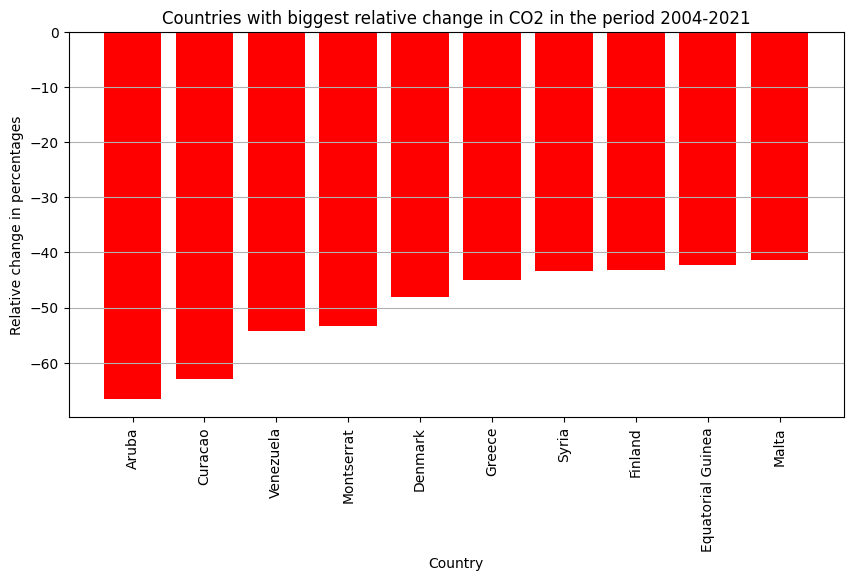

In [ ]:
x = top10['country']
y = top10['relativechange']

fig = plt.figure(figsize = (10, 5))
plt.bar(x, y, color = 'red')
plt.xlabel("Country")
plt.ylabel("Relative change in percentages")
plt.title("Countries with biggest relative change in CO2 in the period 2004-2021")
plt.xticks(rotation = 90)
plt.grid(axis = 'y')
plt.show()

###**CO2 per capita**

In [ ]:
#Because some of these countries may have widely varying populations, we will also look at CO2 per capita, and see if these have very different results:
list(df_CO2.columns)

#Lets create a new dataframe called CO2cap
CO2cap = df_CO2[['country', 'year', 'co2_per_capita']]
CO2cap

,country,year,co2_per_capita
0,Afghanistan,1850,NaN
1,Afghanistan,1851,NaN
2,Afghanistan,1852,NaN
3,Afghanistan,1853,NaN
4,Afghanistan,1854,NaN
...,...,...,...
50593,Zimbabwe,2017,0.651
50594,Zimbabwe,2018,0.784
50595,Zimbabwe,2019,0.724
50596,Zimbabwe,2020,0.677


In [ ]:
# Cleaning the countries again:
# Remove the values we don't want:
values = ['Africa (GCP)',
          'Asia (GCP)',
          'Asia (excl. China and India)',
          'Europe (GCP)',
          'Europe (excl. EU-27)',
          'Europe (excl. EU-28)',
          'European Union (27) (GCP)',
          'European Union (28)',
          'French Equatorial Africa (GCP)',
          'French Equatorial Africa (Jones et al. 2023)',
          'French West Africa (GCP)',
          'French West Africa (Jones et al. 2023)',
          'International transport',
          'Kuwaiti Oil Fires (GCP)',
          'Kuwaiti Oil Fires (Jones et al. 2023)',
          'Least developed countries (Jones et al. 2023)',
          'Middle East (GCP)',
          'Non-OECD (GCP)',
          'North America (GCP)',
          'North America (excl. USA)',
          'OECD (GCP)', 'OECD (Jones et al. 2023)',
          'Oceania (GCP)',
          'Panama Canal Zone (GCP)',
          'Panama Canal Zone (Jones et al. 2023)',
          'Reunion',
          'South America (GCP)',
          'Africa',
          'Africa (GCP)',
          'World',
          'Upper-middle-income countries',
          'Lower-middle-income countries',
          'Low-income countries',
          'Lower-middle-income countries',
          'High-income countries',
          'Central America (GCP)'
          ]

CO2cap = CO2cap[CO2cap.country.isin(values) == False]
checking = CO2cap['country'].unique()
checking

array(['Afghanistan', 'Aland Islands', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'Equa

In [ ]:
# Drop rows where co2percap is empty:
CO2cap.dropna(subset = 'co2_per_capita', inplace = True)
CO2cap

<ipython-input-65-e639e1200441>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CO2cap.dropna(subset = 'co2_per_capita', inplace = True)


,country,year,co2_per_capita
99,Afghanistan,1949,0.002
100,Afghanistan,1950,0.011
101,Afghanistan,1951,0.012
102,Afghanistan,1952,0.012
103,Afghanistan,1953,0.014
...,...,...,...
50593,Zimbabwe,2017,0.651
50594,Zimbabwe,2018,0.784
50595,Zimbabwe,2019,0.724
50596,Zimbabwe,2020,0.677


In [ ]:
#Create a rolling average:

CO2cap['rolling'] = CO2cap.groupby('country')['co2_per_capita'].transform(lambda x: x.rolling(3).mean())
CO2cap

<ipython-input-66-71c1dd816bdc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CO2cap['rolling'] = CO2cap.groupby('country')['co2_per_capita'].transform(lambda x: x.rolling(3).mean())


,country,year,co2_per_capita,rolling
99,Afghanistan,1949,0.002,NaN
100,Afghanistan,1950,0.011,NaN
101,Afghanistan,1951,0.012,0.008333
102,Afghanistan,1952,0.012,0.011667
103,Afghanistan,1953,0.014,0.012667
...,...,...,...,...
50593,Zimbabwe,2017,0.651,0.748667
50594,Zimbabwe,2018,0.784,0.721333
50595,Zimbabwe,2019,0.724,0.719667
50596,Zimbabwe,2020,0.677,0.728333


In [ ]:
#Creating a table with 2014 and 2021 in it:
df_filteredcap2004 = CO2cap[CO2cap['year'] == 2004]
df_filteredcap2021 = CO2cap[CO2cap['year'] == 2021]

df_filteredcap2004.rename(columns = {'year': 'year2004', 'co2_per_capita' : 'co2cap2004', 'rolling':'rolling2004'}, inplace = True)
df_filteredcap2021.rename(columns = {'year': 'year2021', 'co2_per_capita' : 'co2cap2021', 'rolling':'rolling2021'}, inplace = True)


# Now we want to merge these two tables:
df_differencecap = df_filteredcap2004.merge(df_filteredcap2021, on = 'country')
df_differencecap

# # And delete the superfluous rows:
df_differencecap.drop(columns = ['year2004', 'year2021'], inplace = True)
df_differencecap

<ipython-input-67-f98c653e8b8c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filteredcap2004.rename(columns = {'year': 'year2004', 'co2_per_capita' : 'co2cap2004', 'rolling':'rolling2004'}, inplace = True)
<ipython-input-67-f98c653e8b8c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filteredcap2021.rename(columns = {'year': 'year2021', 'co2_per_capita' : 'co2cap2021', 'rolling':'rolling2021'}, inplace = True)


,country,co2cap2004,rolling2004,co2cap2021,rolling2021
0,Afghanistan,0.053,0.062000,0.296,0.296333
1,Albania,1.364,1.318333,1.618,1.663000
2,Algeria,2.702,2.789667,3.990,4.054333
3,Andorra,7.285,7.339333,5.729,5.930000
4,Angola,0.996,0.737000,0.619,0.633333
...,...,...,...,...,...
218,Vietnam,1.066,0.949333,3.345,3.436000
219,Wallis and Futuna,1.724,1.711667,2.387,2.297000
220,Yemen,0.899,0.845333,0.378,0.385333
221,Zambia,0.188,0.188667,0.394,0.400000


In [ ]:
df_differencecap['relativechange'] = (df_differencecap['rolling2021'] - df_differencecap['rolling2004'])/(df_differencecap['rolling2004'])*100
df_differencecap

,country,co2cap2004,rolling2004,co2cap2021,rolling2021,relativechange
0,Afghanistan,0.053,0.062000,0.296,0.296333,377.956989
1,Albania,1.364,1.318333,1.618,1.663000,26.144121
2,Algeria,2.702,2.789667,3.990,4.054333,45.333971
3,Andorra,7.285,7.339333,5.729,5.930000,-19.202471
4,Angola,0.996,0.737000,0.619,0.633333,-14.066033
...,...,...,...,...,...,...
218,Vietnam,1.066,0.949333,3.345,3.436000,261.938202
219,Wallis and Futuna,1.724,1.711667,2.387,2.297000,34.196689
220,Yemen,0.899,0.845333,0.378,0.385333,-54.416404
221,Zambia,0.188,0.188667,0.394,0.400000,112.014134


In [ ]:
top10cap = df_differencecap.sort_values('relativechange', ascending = True).head(10)
top10cap

,country,co2cap2004,rolling2004,co2cap2021,rolling2021,relativechange
50,Curacao,35.150,34.488667,9.686,9.559000,-72.283649
62,Equatorial Guinea,12.056,10.819333,3.197,3.103000,-71.319860
9,Aruba,27.963,27.376667,8.054,7.977000,-70.862048
217,Venezuela,5.768,6.934333,2.828,2.862667,-58.717493
220,Yemen,0.899,0.845333,0.378,0.385333,-54.416404
180,Singapore,10.973,11.315000,5.472,5.211000,-53.946089
123,Malta,6.898,6.938000,3.273,3.217333,-53.627366
54,Denmark,10.174,10.580000,5.052,5.082667,-51.959672
134,Montserrat,10.173,9.447667,4.659,4.553667,-51.801150
196,Syria,2.786,2.689333,1.266,1.297333,-51.760040


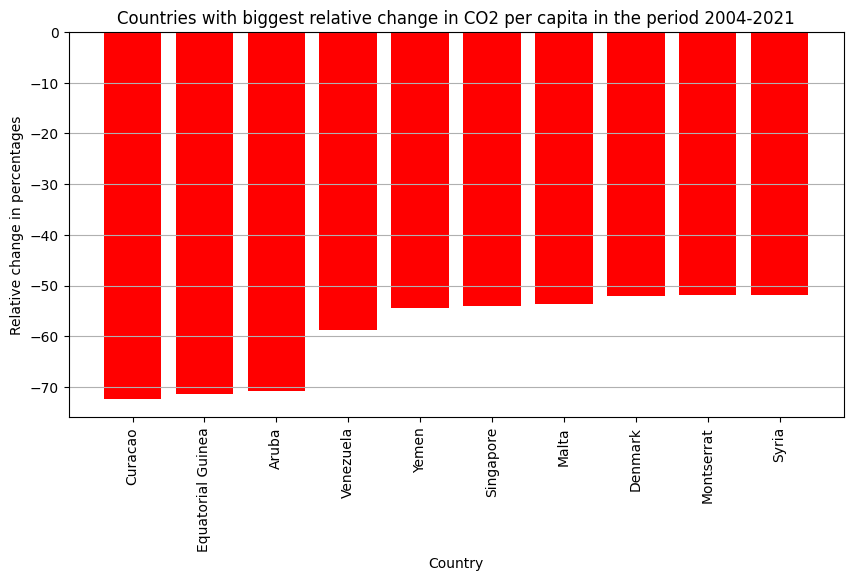

In [ ]:
# Now lets put this in a graph
x = top10cap['country']
y = top10cap['relativechange']

fig = plt.figure(figsize = (10, 5))
plt.bar(x, y, color = 'red')
plt.xlabel("Country")
plt.ylabel("Relative change in percentages")
plt.title("Countries with biggest relative change in CO2 per capita in the period 2004-2021")
plt.xticks(rotation = 90)
plt.grid(axis = 'y')
plt.show()

###**Conclusions CO2 and CO2 per capita reductions**
To answer the question of which countries made the biggest strides in reducing CO2, I looked at the relative change of each country compared to their original CO2. The Kyoto Protocol was ratified in 2004, and came into force in 2005. I therefore looked at data from 2004 and 2021, and calculated the relative change over this time period. From this, the top 10 entities that reduced their CO2 output are: Aruba, Curacao, Venezuela, Montserrat, Denmark, Greece, Syria, Finland, Equatorial GUinea, Malta.

If we look at CO2 per capita, the countries are quire similar, with a few differences: Curacao, Equatorial Guinea, Aruba, Venezuela, Yemen, Singapore, Malta, Denmark, Montserrat, Syria.

#**QUESTION 3**
Which non-fossil fuel energy technology will have the best price in the future?


In [ ]:
#Import the modules:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
#Import the dataset:
url = 'https://raw.githubusercontent.com/NienkevanHeek/datafiles/main/Our%20World%20in%20Data%2C%20Energy%20Prices.csv'
df = pd.read_csv(url)
df

,Entity,Code,Year,Bioenergy levelized cost of energy,Geothermal levelized cost of energy,Offshore wind levelized cost of energy,Solar photovoltaic levelized cost of energy,Concentrated solar power levelized cost of energy,Hydropower levelized cost of energy,Onshore wind levelized cost of energy
0,Australia,AUS,2010,NaN,NaN,NaN,0.423957,NaN,NaN,NaN
1,Australia,AUS,2011,NaN,NaN,NaN,0.430691,NaN,NaN,NaN
2,Australia,AUS,2012,NaN,NaN,NaN,0.261030,NaN,NaN,NaN
3,Australia,AUS,2013,NaN,NaN,NaN,0.150157,NaN,NaN,NaN
4,Australia,AUS,2014,NaN,NaN,NaN,0.123621,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
481,World,OWID_WRL,1995,NaN,NaN,NaN,NaN,NaN,NaN,0.207732
482,World,OWID_WRL,1996,NaN,NaN,NaN,NaN,NaN,NaN,0.185732
483,World,OWID_WRL,1997,NaN,NaN,NaN,NaN,NaN,NaN,0.163131
484,World,OWID_WRL,1998,NaN,NaN,NaN,NaN,NaN,NaN,0.152881


In [ ]:
# Lets rename the columns so that they are somewhat shorter:
df.rename(columns =  {
    'Bioenergy levelized cost of energy':'Bioenergy',
    'Geothermal levelized cost of energy':'Geothermal',
    'Offshore wind levelized cost of energy':'Offshore',
    'Solar photovoltaic levelized cost of energy':'Solar Photovoltaic',
    'Concentrated solar power levelized cost of energy': 'Concentrated Solar Power',
    'Hydropower levelized cost of energy':'Hydropower',
    'Onshore wind levelized cost of energy':'Onshore Wind'}, inplace = True
          )
df

,Entity,Code,Year,Bioenergy,Geothermal,Offshore,Solar Photovoltaic,Concentrated Solar Power,Hydropower,Onshore Wind
0,Australia,AUS,2010,NaN,NaN,NaN,0.423957,NaN,NaN,NaN
1,Australia,AUS,2011,NaN,NaN,NaN,0.430691,NaN,NaN,NaN
2,Australia,AUS,2012,NaN,NaN,NaN,0.261030,NaN,NaN,NaN
3,Australia,AUS,2013,NaN,NaN,NaN,0.150157,NaN,NaN,NaN
4,Australia,AUS,2014,NaN,NaN,NaN,0.123621,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
481,World,OWID_WRL,1995,NaN,NaN,NaN,NaN,NaN,NaN,0.207732
482,World,OWID_WRL,1996,NaN,NaN,NaN,NaN,NaN,NaN,0.185732
483,World,OWID_WRL,1997,NaN,NaN,NaN,NaN,NaN,NaN,0.163131
484,World,OWID_WRL,1998,NaN,NaN,NaN,NaN,NaN,NaN,0.152881


In [ ]:
#Quick check of the countries that are in this list:
df.Entity.unique()

array(['Australia', 'Brazil', 'Canada', 'China', 'Denmark', 'France',
       'Germany', 'India', 'Italy', 'Japan', 'Mexico', 'Netherlands',
       'South Korea', 'Spain', 'Sweden', 'Turkey', 'Ukraine',
       'United Kingdom', 'United States', 'Vietnam', 'World'],
      dtype=object)

<Axes: title={'center': 'Levelized cost of energy by technology'}, xlabel='Year', ylabel='Price in dollar per kWh'>

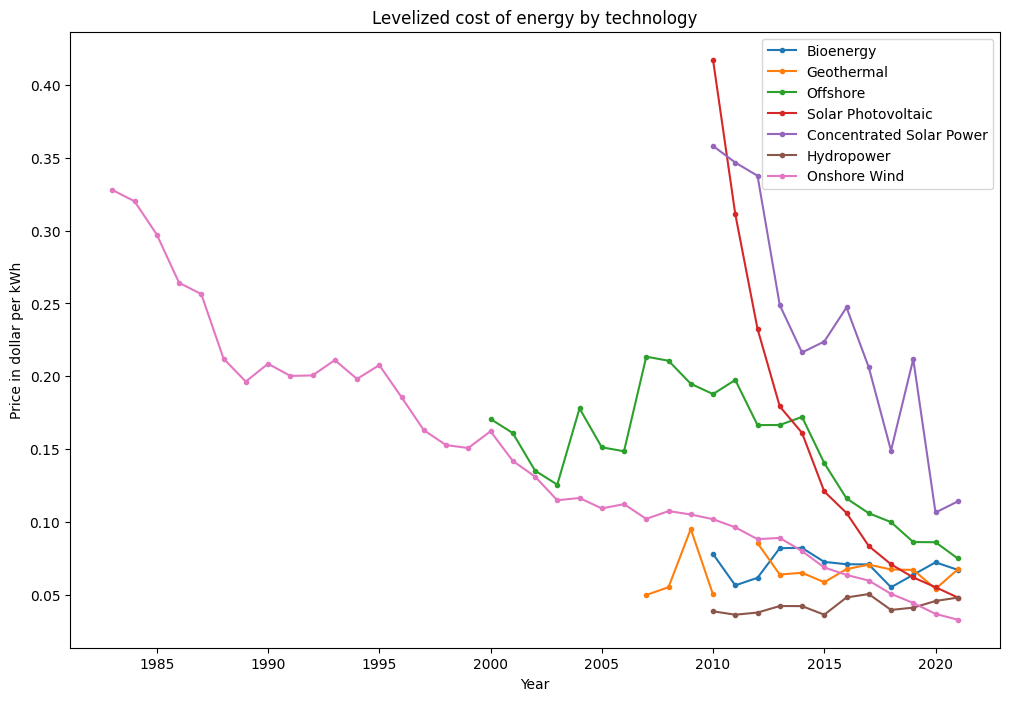

In [ ]:
# Since there is only a limited amount of countries mentioned in this dataset, and because there is an overview 'world' data on these energy prices, I am going to specifically look at world.
# Let's quickly plot the data so we can see if the world looks like it is an average:

grouped = df.groupby('Entity')
world = grouped.get_group('World').sort_values('Year')

world.plot(x='Year',
           y=['Bioenergy', 'Geothermal', 'Offshore', 'Solar Photovoltaic', 'Concentrated Solar Power', 'Hydropower', 'Onshore Wind'],
           figsize = (12, 8),
           title = 'Levelized cost of energy by technology',
           xlabel = 'Year',
           ylabel = 'Price in dollar per kWh',
           marker = '.',
           )


In [ ]:
#Judging from the above graph, for most of these technologies, a linear regression line makes sense.
#Although linear regression will obviously not give the full picture of the price os
#The exception is Solar Photovoltaic, which seems to have a more exponential pattern, and would, if we conduct linear regression, end up with a negative price point.



###**Decisions on regression**
* Judging from the above graph, for most of these technologies, a linear regression line makes sense. I will make price a function of the year.
* Although linear regression based on just year and price will obviously not give the full picture of the future price of these technologies, as these prices are likely influenced by multiple factors, it should give a rough estimate of what the price would be like in the future.
* For some technologies, namely Concentrated Solar, Solar Photovoltaic, and Onshore Wind, the plotted data looks more exponential in nature. For thos, I will use an exponential line. If using a linear pattern in these cases, the price would be less than zero, which is unlikely.

###**Plotting energy prices**

(0.0, 0.5)

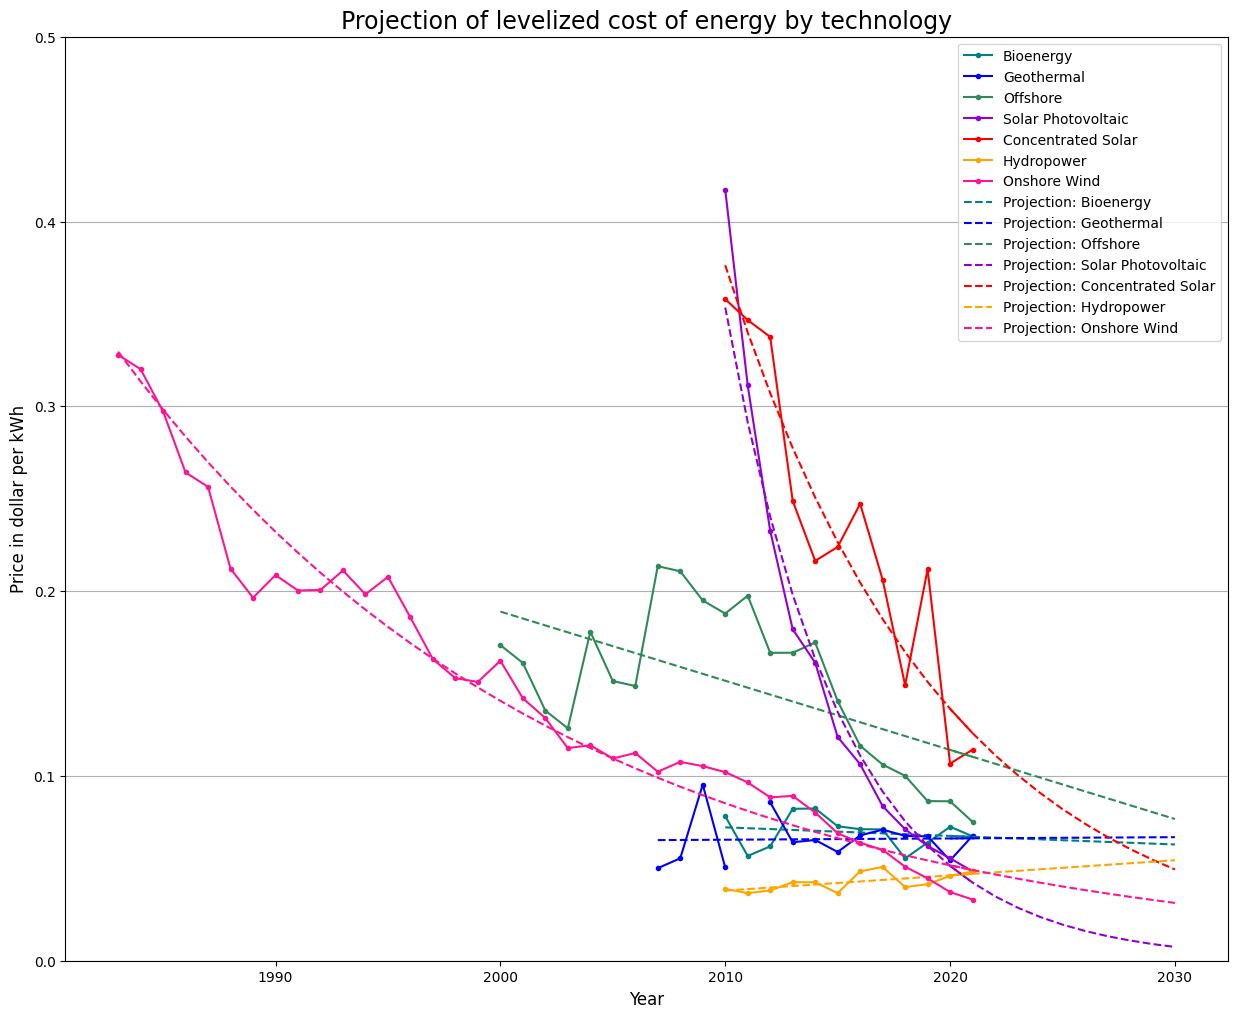

In [ ]:
#Plotting the data
x = world['Year']
Bioenergy = world['Bioenergy']
Geotermal = world['Geothermal']
Offshore = world['Offshore']
Solar_Photo = world['Solar Photovoltaic']
Solar_Conc = world['Concentrated Solar Power']
Hydropower = world['Hydropower']
Onshore_Wind = world['Onshore Wind']

#creating regression lines

#Bioenergy: we need to use the 'isfinite' function to exclude the NaN values
idx_bio = np.isfinite(x) & np.isfinite(Bioenergy)
abio, bbio = np.polyfit(x[idx_bio], Bioenergy[idx_bio], 1)
regressionbio = abio*x +bbio

#Geotermal
idx_geo = np.isfinite(x) & np.isfinite(Geotermal)
ageo, bgeo = np.polyfit(x[idx_geo], Geotermal[idx_geo], 1)
regressiongeo = ageo*x +bgeo

#Offshore
idx_offshore = np.isfinite(x) & np.isfinite(Offshore)
aoff, boff = np.polyfit(x[idx_offshore], Offshore[idx_offshore], 1)
regressionoffshore = aoff*x +boff

#Solar_Photo
idx_photo = np.isfinite(x) & np.isfinite(Solar_Photo)
params_photo = np.polyfit(x[idx_photo], np.log(Solar_Photo[idx_photo]), 1)
regressionphoto = np.exp(params_photo[1]) * np.exp(params_photo[0] * x)

#Solar_Conc
idx_solar = np.isfinite(x) & np.isfinite(Solar_Conc)
params_solar = np.polyfit(x[idx_solar], np.log(Solar_Conc[idx_solar]), 1)
regressionconc = np.exp(params_solar[1]) * np.exp(params_solar[0] * x)

#Hydropower
idx_hydro = np.isfinite(x) & np.isfinite(Hydropower)
ahydro, bhydro = np.polyfit(x[idx_hydro], Hydropower[idx_hydro], 1)
regressionhydro = ahydro*x + bhydro

#Wind
idx_wind = np.isfinite(x) & np.isfinite(Onshore_Wind)
params_wind = np.polyfit(x[idx_wind], np.log(Onshore_Wind[idx_wind]), 1)
regressionwind = np.exp(params_wind[1]) * np.exp(params_wind[0] * x)

# Create an extended x range for projection (2020-2030)
projection_years = np.arange(2020, 2031)

# Project the regression lines beyond the available data range
proj_regressionbio = abio * projection_years + bbio
proj_regressiongeo = ageo * projection_years + bgeo
proj_regressionoffshore = aoff * projection_years + boff
proj_regressionphoto = np.exp(params_photo[1]) * np.exp(params_photo[0] * projection_years)
proj_regressionconc = np.exp(params_solar[1]) * np.exp(params_solar[0] * projection_years)
proj_regressionhydro = ahydro * projection_years + bhydro
proj_regressionwind = np.exp(params_wind[1]) * np.exp(params_wind[0] * projection_years)

#Creating the plots
fig, ax = plt.subplots(figsize = (15,12))

#Bioenergy
plt.plot(x, Bioenergy, marker = '.', label = 'Bioenergy', color = 'teal')
plt.plot(x[idx_bio], regressionbio[idx_bio], color = 'teal', linestyle = '--')

#Geotermal
plt.plot(x, Geotermal, marker = '.', label = 'Geothermal', color = 'blue')
plt.plot(x[idx_geo], regressiongeo[idx_geo], color = 'blue', linestyle = '--')

#Offshore
plt.plot(x, Offshore, marker = '.', label = 'Offshore', color = 'seagreen')
plt.plot(x[idx_offshore], regressionoffshore[idx_offshore], color = 'seagreen', linestyle = '--')

#Solar Photovoltaic
plt.plot(x, Solar_Photo, marker='.', label='Solar Photovoltaic', color='darkviolet')
plt.plot(x[idx_photo], regressionphoto[idx_photo], color='darkviolet', linestyle='--')

#Concentrated Solar Power
plt.plot(x, Solar_Conc, marker = '.', label = 'Concentrated Solar', color = 'red')
plt.plot(x[idx_solar], regressionconc[idx_solar], color = 'red', linestyle = '--')

#Hydropower
plt.plot(x, Hydropower, marker = '.', label = 'Hydropower', color = 'orange')
plt.plot(x[idx_hydro], regressionhydro[idx_hydro], color = 'orange', linestyle = '--')

#Wind
plt.plot(x, Onshore_Wind, marker = '.', label = 'Onshore Wind', color = 'deeppink')
plt.plot(x[idx_wind], regressionwind[idx_wind], color = 'deeppink', linestyle = '--')

# Plot projection lines
plt.plot(projection_years, proj_regressionbio, color='teal', linestyle='--', label='Projection: Bioenergy')
plt.plot(projection_years, proj_regressiongeo, color='blue', linestyle='--', label='Projection: Geothermal')
plt.plot(projection_years, proj_regressionoffshore, color='seagreen', linestyle='--', label='Projection: Offshore')
plt.plot(projection_years, proj_regressionphoto, color='darkviolet', linestyle='--', label='Projection: Solar Photovoltaic')
plt.plot(projection_years, proj_regressionconc, color='red', linestyle='--', label='Projection: Concentrated Solar')
plt.plot(projection_years, proj_regressionhydro, color='orange', linestyle='--', label='Projection: Hydropower')
plt.plot(projection_years, proj_regressionwind, color='deeppink', linestyle='--', label='Projection: Onshore Wind')

#Plot info
plt.legend()
plt.grid(axis = 'y')
ax.set_title('Projection of levelized cost of energy by technology', fontsize = 17)
ax.set_xlabel('Year', fontsize = 12)
ax.set_ylabel('Price in dollar per kWh', fontsize = 12)
ax.set_ylim(0,0.5)

###**Conclusions best future price**
The above plots give an indication of price development of renewable energy technologies from 2020-2030. Projected prices are best for Solar Photovoltaic, followed by Onshore Wind, and Concentrated Solar.